## Project Premise: Understanding the Heart Disease Data Landscape

Our project aims to predict the presence of heart disease using various patient features, following the guideline which specifies the target variable "goal" as an integer value from 0 (no presence) to 4. As data science students, we understand that the foundation of any reliable model is high-quality, well-understood data. Therefore, our initial step was to investigate the available datasets for this task.

A common source for heart disease data is the UCI Machine Learning Repository, which contains several datasets like Cleveland, Hungarian, Switzerland, and Long Beach VA. These originally had 76 attributes, but most analyses, including the widely cited ones, focus on a subset of 14 due to extensive missing data in the others.

However, research, notably the thesis by  **[Brandon Simmons (2021)](https://libres.uncg.edu/ir/ecsu/f/Brandon_Simmons_Thesis-Final.pdf)**, has uncovered significant issues within these commonly used datasets. Simmons investigated datasets from UCI, Kaggle, and Dataport, finding problems related to human errors in encoding, data duplication, and potentially misleading information stemming from these inconsistencies.

**Key Findings from Simmons' Investigation:**

1.  **Kaggle vs. Cleveland Confusion:** A highly popular heart disease dataset on Kaggle (often named `heart.csv` or similar, derived from UCI) was found to be closely related to the Cleveland dataset (303 observations). However, Simmons identified critical discrepancies:
    * The 6 missing values present in the original Cleveland data ('ca' and 'thal' features) were imputed in the Kaggle version, likely using a nearest neighbor approach.
    * More importantly, the target variable encoding was reversed. While the Cleveland data uses 0 for "Absence" and 1-4 for varying degrees of "Presence", the Kaggle version used a binary target where 1 meant "Presence" and 0 meant "Absence" in its raw form, but Simmons argues based on feature correlations that it should be interpreted (or recoded) as 0="Presence" and 1="Absence" to align medically. This inversion in many public analyses led to counter-intuitive results, such as suggesting younger individuals were *more* likely to have heart disease.
2.  **Statlog Dataset:** Another UCI dataset, Statlog (270 observations), was found to be complete (no missing values). Simmons' analysis revealed that the Statlog dataset is actually a *proper subset* of the Cleveland dataset. Including both in an analysis without addressing this overlap would introduce significant duplication.
3.  **Combined Datasets (e.g., ORIG/MISS):** Attempts have been made to combine multiple heart disease datasets (like the ORIG dataset Simmons analyzed, which claimed to merge 5 sources including Cleveland and Statlog). Simmons found these combined datasets suffered from the expected high duplication rates (~40% in ORIG due to the Cleveland/Statlog overlap) and potentially poor data quality in the non-Cleveland portions (e.g., ~28% zero values for cholesterol, ~46% zero values for oldpeak, highly skewed gender distribution in the 'MISS' subset he derived).
4.  **Recommendation:** Based on these findings, Simmons concluded that the **Cleveland dataset** is the most reliable starting point for statistical analysis and machine learning, provided its few missing values are handled appropriately. He recommended recoding the target variable to binary (0 = Absence, 1 = Presence) for modeling consistency and identified `thalach` (maximum heart rate), `oldpeak` (ST depression induced by exercise relative to rest), and `cp` (chest pain type) as the most statistically significant predictors in a reduced model.

**Other Datasets Considered:**

We also reviewed other specific datasets on heart disease:

1.  **[Fedesoriano - Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)**: This dataset contains 918 observations and 11 features common across 5 combined heart datasets (reportedly including Cleveland and Statlog). Its target is binary (0=No, 1=Yes). While larger, Simmons' warnings about duplication and data quality in combined sets apply. Discussions on Kaggle confirm issues like '0' cholesterol values needing attention. The features are similar but not identical to the original 14 UCI attributes (e.g., 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak' are present).
2.  **[Sulianova - Cardiovascular Disease Dataset](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset)**: This is a significantly larger dataset (70,000 records) with different features focused on general cardiovascular risk (e.g., age in days, height, weight, separate systolic/diastolic BP, categorical cholesterol/glucose levels, smoking, alcohol, physical activity). The target is binary CVD presence. While valuable for exploring different risk factors, its feature set differs substantially from the UCI/Cleveland data traditionally used for the specific 0-4 heart disease prediction task.

**Our Approach:**

Given the project's goal and the insights from Simmons' thorough investigation, we will initially focus our efforts on the **Cleveland dataset** sourced directly from UCI or a verified version. This allows us to build upon a dataset with known, manageable issues (minor missing data) rather than navigating the undocumented inconsistencies, potential target reversals, and duplication problems found in readily available Kaggle versions or combined datasets.

We will perform careful preprocessing:
* Address the eventual missing values in 'ca' and 'thal' (likely through imputation or feature removal, as Simmons eventually dropped them).
* Ensure correct data types for all features (numeric vs. categorical).
* Decide on the target variable: Use the original 0-4 scale as specified in the project intro for models that support multi-class (like Naive Bayes, potentially the multinomial classifier) or convert to binary (0 vs. 1-4) as Simmons did, which might be necessary for other classifiers or ROC/AUC analysis focused on binary presence/absence. This decision will be documented.

Using the other datasets, particularly the large Sulianova dataset, could be an interesting extension for the "additional classifier" component or as a comparative study, fulfilling the requirement to demonstrate knowledge of data challenges and potentially add value. However, we recognize they represent different feature sets and potentially different prediction tasks ('heart failure prediction' or 'cardiovascular disease risk' vs. the specific 0-4 'heart disease presence').

---

In [1]:
columns = [
    "age", "sex", "cp", "trestbps", "chol",
    "fbs", "restecg", "thalach", "exang", "oldpeak",
    "slope", "ca", "thal", "num"
]


In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
# Nomi dei file (aggiusta il percorso se necessario)
file_paths = {
    "cleveland": "processed.cleveland.data",
    "hungarian": "processed.hungarian.data",
    "switzerland": "processed.switzerland.data",
    "va": "processed.va.data"
}

# Nomi delle colonne (secondo documentazione ufficiale)
columns = [
    "age", "sex", "cp", "trestbps", "chol",
    "fbs", "restecg", "thalach", "exang", "oldpeak",
    "slope", "ca", "thal", "num"
]


In [4]:
def load_dataset(path):
    df = pd.read_csv(path, header=None, names=columns)
    
    # Sostituisci ? con NaN (valori mancanti)
    df.replace("?", np.nan, inplace=True)
    
    # Converte le colonne in numerico (ora che "?" è stato tolto)
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        
    return df


In [5]:
datasets = {}

for name, path in file_paths.items():
    datasets[name] = load_dataset(path)
    print(f"{name} dataset: {datasets[name].shape[0]} rows, {datasets[name].shape[1]} columns")


cleveland dataset: 303 rows, 14 columns
hungarian dataset: 294 rows, 14 columns
switzerland dataset: 123 rows, 14 columns
va dataset: 200 rows, 14 columns


In [6]:
# Visualizza le prime righe del dataset di Cleveland
datasets["cleveland"].head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### 🩺 Feature Descriptions – Heart Disease Dataset

Below is a description of the 14 columns present in the processed heart disease datasets. These features are used to predict the presence and severity of heart disease (target variable: `num`).

| Feature     | Description | Type | Range / Values |
|-------------|-------------|------|----------------|
| **age**     | Age of the patient in years. | Continuous | ~29 to 77 |
| **sex**     | Biological sex of the patient. | Binary | 1 = male, 0 = female |
| **cp**      | Chest pain type, a clinical symptom category. | Categorical | 1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic |
| **trestbps**| Resting blood pressure (in mm Hg). | Continuous | ~90 to 200 |
| **chol**    | Serum cholesterol in mg/dl. | Continuous | ~120 to 565 |
| **fbs**     | Fasting blood sugar > 120 mg/dl. | Binary | 1 = true, 0 = false |
| **restecg** | Resting electrocardiographic results. | Categorical | 0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy |
| **thalach** | Maximum heart rate achieved during stress test. | Continuous | ~70 to 202 |
| **exang**   | Exercise-induced angina. | Binary | 1 = yes, 0 = no |
| **oldpeak** | ST depression induced by exercise relative to rest. | Continuous | ~0.0 to 6.2 |
| **slope**   | Slope of the ST segment during peak exercise. | Categorical | 1 = upsloping, 2 = flat, 3 = downsloping |
| **ca**      | Number of major vessels (0–3) colored by fluoroscopy. | Discrete | 0 to 3 (sometimes 4), ? if missing |
| **thal**    | Thallium stress test result. | Categorical | 3 = normal, 6 = fixed defect, 7 = reversible defect, ? if missing |
| **num**     | Target variable: severity of heart disease. | Ordinal (Target) | 0 = no disease, 1–4 = increasing severity |


In [7]:
# Controllo dei valori mancanti e anomali
for name, df in datasets.items():
    print(f"\n📂 Dataset: {name.upper()}")
    print(f"➡️ Shape: {df.shape[0]} rows × {df.shape[1]} columns")
    
    # Conta valori NaN (dopo la tua conversione con .replace e .to_numeric)
    missing_values = df.isna().sum()
    
    # Mostra solo le colonne con almeno 1 valore mancante
    missing_summary = missing_values[missing_values > 0]
    
    if missing_summary.empty:
        print("✅ No missing values")
    else:
        print("❗ Missing values per column:")
        print(missing_summary)




📂 Dataset: CLEVELAND
➡️ Shape: 303 rows × 14 columns
❗ Missing values per column:
ca      4
thal    2
dtype: int64

📂 Dataset: HUNGARIAN
➡️ Shape: 294 rows × 14 columns
❗ Missing values per column:
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
slope       190
ca          291
thal        266
dtype: int64

📂 Dataset: SWITZERLAND
➡️ Shape: 123 rows × 14 columns
❗ Missing values per column:
trestbps      2
fbs          75
restecg       1
thalach       1
exang         1
oldpeak       6
slope        17
ca          118
thal         52
dtype: int64

📂 Dataset: VA
➡️ Shape: 200 rows × 14 columns
❗ Missing values per column:
trestbps     56
chol          7
fbs           7
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
dtype: int64


In [8]:
# Copia di sicurezza del dataset originale
df_cleveland_clean = datasets["cleveland"].dropna()

# Verifica nuovo shape
print(f"Original shape: {datasets['cleveland'].shape}")
print(f"Cleaned shape: {df_cleveland_clean.shape}")


Original shape: (303, 14)
Cleaned shape: (297, 14)


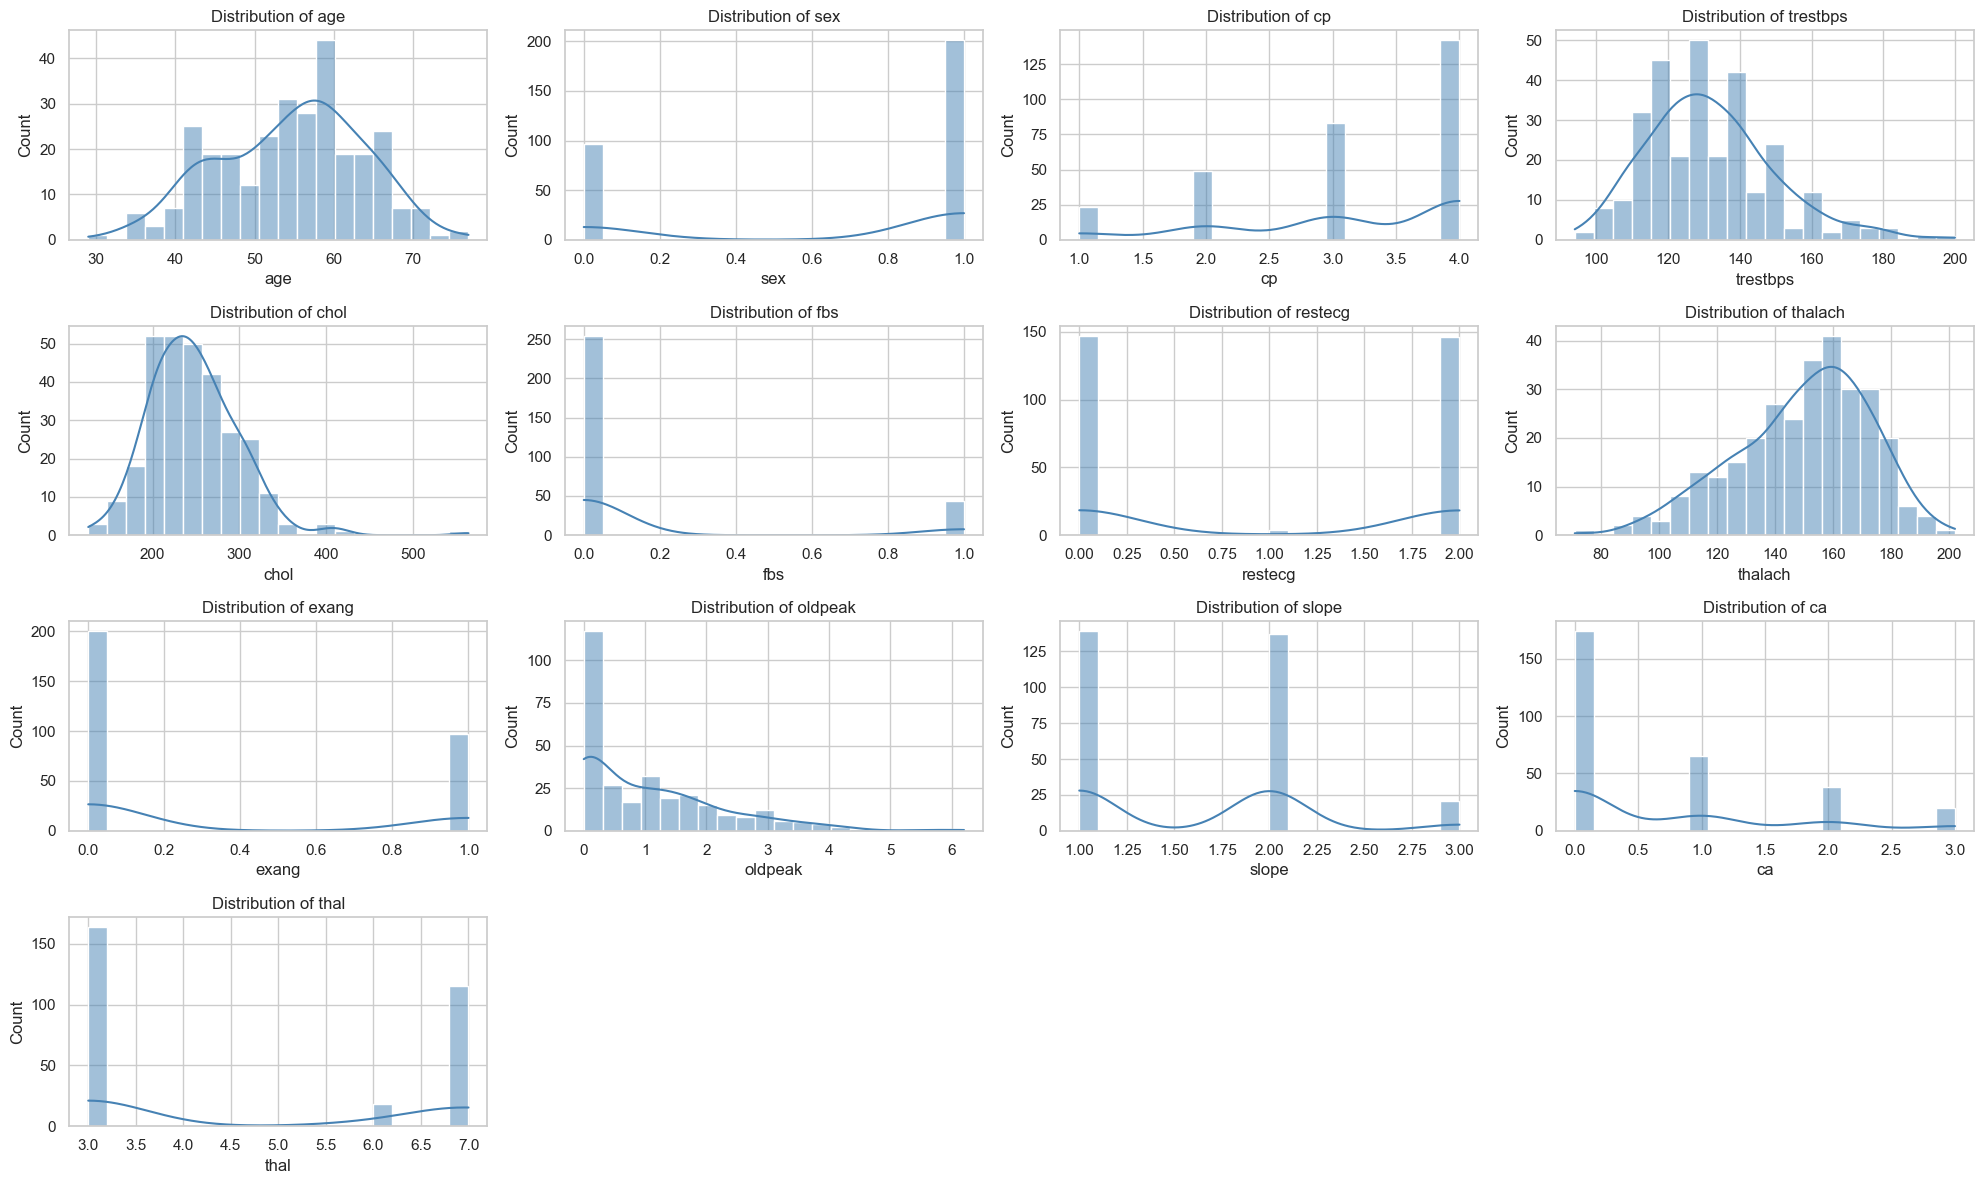

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Imposta lo stile dei grafici
sns.set(style="whitegrid")

# Lista delle feature da visualizzare (escludiamo 'num')
features = df_cleveland_clean.columns.drop("num")

# Numero di colonne e righe per il layout del grafico
n_cols = 4
n_rows = int(np.ceil(len(features) / n_cols))

# Crea la figura con sottografici
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12))
axes = axes.flatten()

# Ciclo sulle feature per disegnare ogni distribuzione
for i, col in enumerate(features):
    sns.histplot(df_cleveland_clean[col], kde=True, ax=axes[i], bins=20, color='steelblue')
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# Rimuove eventuali assi vuoti
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [10]:
for name, df in datasets.items():
    num_duplicates = df.duplicated().sum()
    print(f"📂 Dataset: {name.upper()} → Duplicated rows: {num_duplicates}")


📂 Dataset: CLEVELAND → Duplicated rows: 0
📂 Dataset: HUNGARIAN → Duplicated rows: 1
📂 Dataset: SWITZERLAND → Duplicated rows: 0
📂 Dataset: VA → Duplicated rows: 1


In [11]:
for name, df in datasets.items():
    before = df.shape[0]
    datasets[name] = df.drop_duplicates()
    after = datasets[name].shape[0]
    print(f"📂 Dataset: {name.upper()} → Removed {before - after} duplicated rows")



📂 Dataset: CLEVELAND → Removed 0 duplicated rows
📂 Dataset: HUNGARIAN → Removed 1 duplicated rows
📂 Dataset: SWITZERLAND → Removed 0 duplicated rows
📂 Dataset: VA → Removed 1 duplicated rows


In [12]:
# Mappatura dei valori thal: normale (3) → 0, reversibile (7) → 1, fisso (6) → 2
thal_mapping = {3: 0, 7: 1, 6: 2}

# Applichiamo la mappatura solo su df_cleveland_clean
df_cleveland_clean["thal"] = df_cleveland_clean["thal"].map(thal_mapping)

# Controllo dei nuovi valori
print("🧾 Nuovi valori unici in 'thal':", df_cleveland_clean["thal"].unique())


🧾 Nuovi valori unici in 'thal': [2 0 1]


### 4. Exploratory Data Analysis (EDA) & Principal Component Analysis (PCA)

We apply PCA to the cleaned feature set (excluding the target variable `num`) to visualize the data in lower dimensions (2D and 3D) and observe potential class separation. Features are standardized before applying PCA.

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import pandas as pd

# Prepare data for PCA
# Ensure df_cleveland_clean is the final cleaned DataFrame before this step
X_pca = df_cleveland_clean.drop("num", axis=1)
y_pca = df_cleveland_clean["num"] # Target for coloring

# Standardize features before PCA
scaler_pca = StandardScaler()
X_pca_scaled = scaler_pca.fit_transform(X_pca)

# PCA for 2 components
pca_2d = PCA(n_components=2, random_state=42)
X_pca_2d = pca_2d.fit_transform(X_pca_scaled)

df_pca_2d = pd.DataFrame(data=X_pca_2d, columns=['PC1', 'PC2'])
# Ensure y_pca.values is used if X_pca_scaled might have a different index than df_cleveland_clean after some operations
# For df_cleveland_clean directly, y_pca should align.
df_pca_2d['target'] = y_pca.reset_index(drop=True) # Use reset_index to ensure alignment if y_pca is a Series from a filtered df
df_pca_2d['target'] = df_pca_2d['target'].astype(str) # Plotly prefers categorical for color legend

print(f"Explained variance by 2 components: {pca_2d.explained_variance_ratio_.sum():.4f}")

fig_2d = px.scatter(
    df_pca_2d, 
    x='PC1', 
    y='PC2', 
    color='target',
    title='2D PCA of Cleveland Dataset (Colored by \'num\')',
    labels={'color': 'Heart Disease (num)'},
    hover_data={ # Adding original feature values to hover
        original_col: X_pca[original_col].reset_index(drop=True) for original_col in X_pca.columns
    }
)
fig_2d.update_layout(
    height=600, 
    width=800,
    legend_title_text='Heart Disease (num)'
)
fig_2d.show()

# PCA for 3 components
pca_3d = PCA(n_components=3, random_state=42)
X_pca_3d = pca_3d.fit_transform(X_pca_scaled)

df_pca_3d = pd.DataFrame(data=X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
df_pca_3d['target'] = y_pca.reset_index(drop=True) # Use reset_index for alignment
df_pca_3d['target'] = df_pca_3d['target'].astype(str) # Plotly prefers categorical for color legend

print(f"Explained variance by 3 components: {pca_3d.explained_variance_ratio_.sum():.4f}")

# Create a temporary DataFrame for hover data for the 3D plot
# This ensures all original features are available for hover
hover_df_3d = X_pca.reset_index(drop=True).copy()
hover_df_3d['PC1'] = df_pca_3d['PC1']
hover_df_3d['PC2'] = df_pca_3d['PC2']
hover_df_3d['PC3'] = df_pca_3d['PC3']
hover_df_3d['target_original_num'] = y_pca.reset_index(drop=True).astype(str)


fig_3d = px.scatter_3d(
    hover_df_3d, # Use the combined df for plotting and hover
    x='PC1', 
    y='PC2', 
    z='PC3', 
    color='target_original_num', # Color by the original target
    title='3D PCA of Cleveland Dataset (Colored by \'num\')',
    labels={'color': 'Heart Disease (num)', 'target_original_num': 'Heart Disease (num)'},
    hover_data=X_pca.columns.tolist() # List all original feature columns for hover
)
fig_3d.update_layout(
    height=700, 
    width=900,
    legend_title_text='Heart Disease (num)'
)
fig_3d.show()

Explained variance by 2 components: 0.3597


Explained variance by 3 components: 0.4577


#### PCA Visualization (Multi-class Target `num`) - Interpretation

The 2D and 3D PCA plots visualize the dataset reduced to its first two and three principal components, respectively. The points are colored by the original heart disease severity target (`num`, ranging from 0 to 4).

**Observations:**
*   **Overlap:** There is significant overlap between the different classes, especially for classes 1 through 4, which represent varying degrees of heart disease. Class 0 (no disease) appears somewhat more distinct in certain regions of the PCA space, but clear separation is not evident.
*   **Variance Explained:** The printed explained variance ratios indicate how much of the total variance in the original 13-dimensional feature space is captured by these principal components. Typically, the first few components capture the most variance.
    *   For 2D PCA, if the variance is low (e.g., < 50%), it means a lot of information is lost, and the 2D representation might not fully reflect the data's structure.
    *   The 3D PCA generally captures more variance than the 2D PCA.
*   **Clustering Tendencies:** While distinct clusters for each of the 5 classes are not clearly visible, the plots can give an initial impression of the data's distribution. The lack of clear separation suggests that linear dimensionality reduction via PCA alone is not sufficient to perfectly distinguish all classes of heart disease severity using just these components. This implies that more complex, non-linear models or the original feature space might be necessary for accurate classification.

These plots are primarily for exploratory purposes to understand the inherent structure and separability of the data in a reduced dimensional space.

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import pandas as pd
import numpy as np # For np.where or .apply

# Create a new DataFrame or copy to avoid altering df_cleveland_clean if needed elsewhere with original 'num'
df_pca_binary_target = df_cleveland_clean.copy()

# Create the binary target variable
# 0 = no disease (num == 0)
# 1 = any disease (num > 0)
df_pca_binary_target['target_binary'] = df_pca_binary_target['num'].apply(lambda x: 0 if x == 0 else 1)

# Prepare data for PCA
X_pca_bin = df_pca_binary_target.drop(columns=["num", "target_binary"], axis=1)
y_pca_bin = df_pca_binary_target["target_binary"] # Binary target for coloring

# Standardize features before PCA (using the same features as before)
# If X_pca_scaled from the previous cell is suitable and uses the same base features,
# you could potentially reuse it. However, for clarity and independence of cells,
# it's often better to rescale, especially if the feature set X_pca_bin might differ subtly.
# Assuming X_pca_bin has the same columns as X_pca from the previous cell:
scaler_pca_bin = StandardScaler()
X_pca_bin_scaled = scaler_pca_bin.fit_transform(X_pca_bin)

# PCA for 3 components
pca_3d_bin = PCA(n_components=3, random_state=42)
X_pca_3d_bin_transformed = pca_3d_bin.fit_transform(X_pca_bin_scaled)

df_pca_3d_bin = pd.DataFrame(data=X_pca_3d_bin_transformed, columns=['PC1', 'PC2', 'PC3'])
df_pca_3d_bin['target'] = y_pca_bin.reset_index(drop=True) # Add binary target for coloring
df_pca_3d_bin['target'] = df_pca_3d_bin['target'].astype(str) # Plotly prefers categorical for color legend

print(f"Explained variance by 3 components (binary target context): {pca_3d_bin.explained_variance_ratio_.sum():.4f}")
# This explained variance will be the same as the previous 3D PCA if the input features X are identical.
# The PCA itself is unsupervised and doesn't use target information for fitting.

# Create a temporary DataFrame for hover data for the 3D plot
# This ensures all original features are available for hover
hover_df_3d_bin = X_pca_bin.reset_index(drop=True).copy()
hover_df_3d_bin['PC1'] = df_pca_3d_bin['PC1']
hover_df_3d_bin['PC2'] = df_pca_3d_bin['PC2']
hover_df_3d_bin['PC3'] = df_pca_3d_bin['PC3']
hover_df_3d_bin['target_binary_val'] = y_pca_bin.reset_index(drop=True).astype(str) # The binary target

fig_3d_binary = px.scatter_3d(
    hover_df_3d_bin,
    x='PC1', 
    y='PC2', 
    z='PC3', 
    color='target_binary_val', # Color by the binary target
    title='3D PCA of Cleveland Dataset (Colored by Binary Target)',
    labels={'color': 'Heart Disease (Binary)', 'target_binary_val': 'Heart Disease (Binary: 0=No, 1=Yes)'},
    hover_data=X_pca_bin.columns.tolist(), # List all original feature columns for hover
    color_discrete_map={'0': 'blue', '1': 'red'} # Optional: specific colors for binary classes
)
fig_3d_binary.update_layout(
    height=700, 
    width=900,
    legend_title_text='Heart Disease (Binary)'
)
fig_3d_binary.show()

Explained variance by 3 components (binary target context): 0.4577


#### PCA Visualization (Binary Target) - Interpretation

This 3D PCA plot shows the data reduced to its first three principal components, with points colored by the binary target: '0' for no heart disease (blue) and '1' for the presence of heart disease (red).

**Observations:**
*   **Separation Trend:** Compared to the multi-class PCA, the binary target visualization shows a somewhat clearer, albeit still imperfect, tendency for separation between the two groups. We can observe regions where one color (class) is more dominant than the other.
*   **Continued Overlap:** Despite the binary grouping, there remains a substantial overlap between the 'disease' and 'no disease' classes in the 3D PCA space. This indicates that the first three principal components, while capturing the most variance, do not create a linearly separable space for these two classes.
*   **Implications for Modeling:** The overlap suggests that linear classifiers operating solely on these three principal components would likely struggle to achieve perfect accuracy. Non-linear models or models using the full feature set will likely be necessary to better distinguish between patients with and without heart disease.
*   **Utility of PCA:** PCA helps to visualize the overall data structure. The degree of separation seen here gives a visual heuristic about the difficulty of the classification task, even with a simplified binary target. The fact that the classes are not perfectly separated by the components that explain the most variance in the data is an important insight.

This visualization reinforces the idea that while there are patterns in the data that PCA can pick up, the relationship between the features and the presence of heart disease is complex.

In [15]:
# Soglia per considerare una colonna "categorica": poche categorie uniche
categorical_threshold = 10

# Separiamo le colonne in numeriche e categoriche
for col in df_cleveland_clean.columns:
    print(f"\n🔍 Feature: {col}")
    unique_vals = df_cleveland_clean[col].nunique()
    
    if unique_vals <= categorical_threshold:
        # Considerata categorica/discreta
        print("📊 Categorical / Discrete variable")
        print(df_cleveland_clean[col].value_counts().sort_index())
    else:
        # Considerata continua
        print("📈 Continuous variable")
        print(f"Min: {df_cleveland_clean[col].min()}")
        print(f"Max: {df_cleveland_clean[col].max()}")
        print(f"Mean: {df_cleveland_clean[col].mean():.2f}")
        print(f"Std Dev: {df_cleveland_clean[col].std():.2f}")



🔍 Feature: age
📈 Continuous variable
Min: 29.0
Max: 77.0
Mean: 54.54
Std Dev: 9.05

🔍 Feature: sex
📊 Categorical / Discrete variable
sex
0.0     96
1.0    201
Name: count, dtype: int64

🔍 Feature: cp
📊 Categorical / Discrete variable
cp
1.0     23
2.0     49
3.0     83
4.0    142
Name: count, dtype: int64

🔍 Feature: trestbps
📈 Continuous variable
Min: 94.0
Max: 200.0
Mean: 131.69
Std Dev: 17.76

🔍 Feature: chol
📈 Continuous variable
Min: 126.0
Max: 564.0
Mean: 247.35
Std Dev: 52.00

🔍 Feature: fbs
📊 Categorical / Discrete variable
fbs
0.0    254
1.0     43
Name: count, dtype: int64

🔍 Feature: restecg
📊 Categorical / Discrete variable
restecg
0.0    147
1.0      4
2.0    146
Name: count, dtype: int64

🔍 Feature: thalach
📈 Continuous variable
Min: 71.0
Max: 202.0
Mean: 149.60
Std Dev: 22.94

🔍 Feature: exang
📊 Categorical / Discrete variable
exang
0.0    200
1.0     97
Name: count, dtype: int64

🔍 Feature: oldpeak
📈 Continuous variable
Min: 0.0
Max: 6.2
Mean: 1.06
Std Dev: 1.17

🔍 Fea

### 📝 Feature Analysis Summary

After computing descriptive statistics and value distributions for the cleaned Cleveland dataset, we observed the following:

- All continuous features (age, trestbps, chol, thalach, oldpeak) appear to have clinically plausible ranges. Only cholesterol (`chol`) shows a very high max value (564 mg/dl), which could be an outlier worth visualizing.
- Categorical features like `cp`, `slope`, and `restecg` show some imbalance. For example, `cp=4` (asymptomatic) dominates, and `restecg=1` appears in only 4 records.
- The feature `thal` was remapped to reflect clinical severity (0 = normal, 1 = reversible defect, 2 = fixed defect), and is now suitable for modeling.
- The target variable `num` is imbalanced: 160 of 297 patients have no heart disease (`num=0`). This will require special consideration during model evaluation (e.g., using balanced accuracy, ROC/AUC).


Text(0.5, 1.0, 'Feature Correlation Matrix (Cleveland Dataset)')

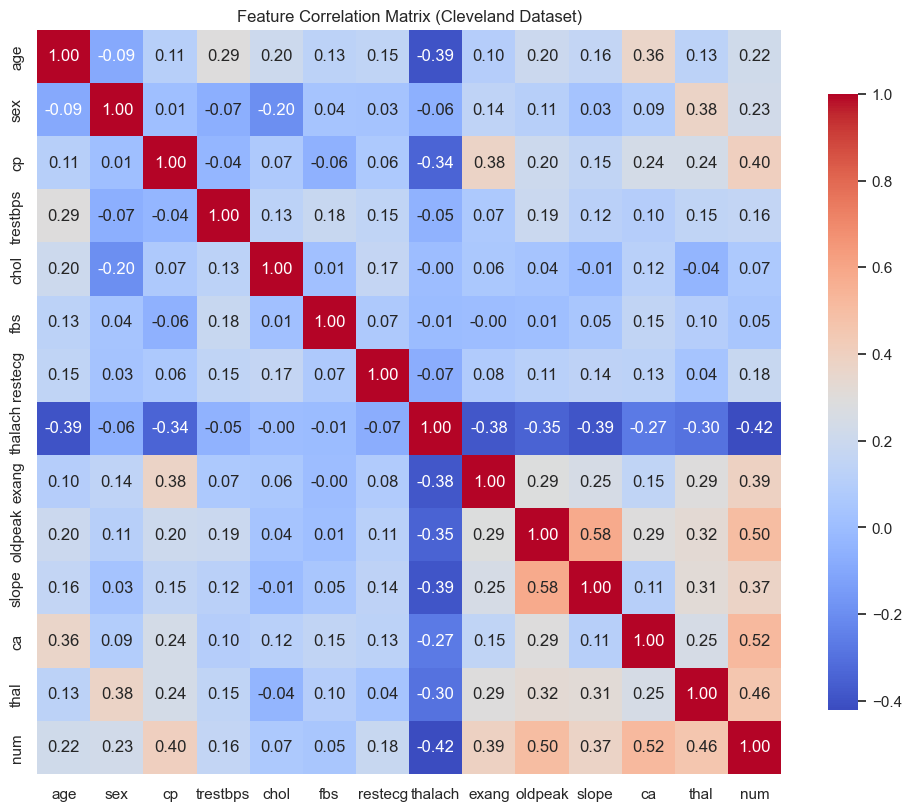

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcolo della matrice di correlazione
correlation_matrix = df_cleveland_clean.corr()

# Heatmap con annotazioni
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Feature Correlation Matrix (Cleveland Dataset)")


🔍 Correlation with target variable (num):

ca          0.521178
oldpeak     0.501461
thal        0.458005
cp          0.404248
exang       0.391613
slope       0.374689
sex         0.226797
age         0.222156
restecg     0.184136
trestbps    0.159620
chol        0.066448
fbs         0.049040
thalach    -0.420639
Name: num, dtype: float64


C:\Users\miror\AppData\Local\Temp\ipykernel_14028\183793880.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




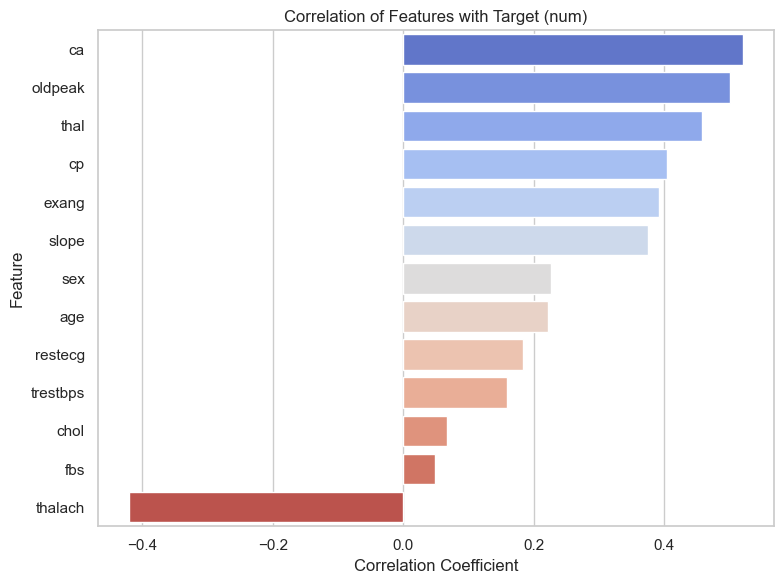


🔗 High correlations between features (|corr| > 0.5):



,Feature 1,Feature 2,Correlation
81,oldpeak,slope,0.579037
89,ca,num,0.521178
84,oldpeak,num,0.501461


In [17]:
# Calcolo della matrice di correlazione
corr_matrix = df_cleveland_clean.corr()

# === 1. Correlazioni con il target 'num', ordinate per importanza ===
target_corr = corr_matrix["num"].drop("num").sort_values(ascending=False)
print("🔍 Correlation with target variable (num):\n")
print(target_corr)

# === 2. Visualizzazione delle correlazioni con 'num' ===
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x=target_corr.values, y=target_corr.index, palette="coolwarm")
plt.title("Correlation of Features with Target (num)")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

# === 3. Correlazioni forti tra tutte le feature (|corr| > 0.5) ===
def get_high_correlations(corr_matrix, threshold=0.5):
    corr_pairs = (
        corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        .stack()
        .reset_index()
    )
    corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
    high_corrs = corr_pairs[abs(corr_pairs['Correlation']) > threshold]
    return high_corrs.sort_values(by='Correlation', ascending=False)

high_corrs_df = get_high_correlations(corr_matrix)
print("\n🔗 High correlations between features (|corr| > 0.5):\n")
display(high_corrs_df)


In [18]:
# Calcola matrice di correlazione su tutte le feature
corr_matrix = df_cleveland_clean.drop(columns=["num"]).corr()

# Estrai solo la parte superiore della matrice (senza duplicati)
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# "Stack" per trasformare in DataFrame e ordina in base al valore assoluto della correlazione
sorted_corrs = (
    upper_triangle.stack()
    .reset_index()
    .rename(columns={'level_0': 'Feature 1', 'level_1': 'Feature 2', 0: 'Correlation'})
    .assign(AbsCorr=lambda df: df['Correlation'].abs())
    .sort_values(by='AbsCorr', ascending=False)
    .drop(columns='AbsCorr')
)

# Seleziona le 10 più forti
top_10_corrs = sorted_corrs.head(20)

# Mostra la tabella
print("🔗 Top 10 strongest correlations between features (excluding 'num'):\n")
display(top_10_corrs)


🔗 Top 10 strongest correlations between features (excluding 'num'):



,Feature 1,Feature 2,Correlation
72,oldpeak,slope,0.579037
6,age,thalach,-0.394563
65,thalach,slope,-0.389307
63,thalach,exang,-0.384368
28,cp,exang,0.377525
22,sex,thal,0.375867
10,age,ca,0.362210
64,thalach,oldpeak,-0.347640
27,cp,thalach,-0.339308
74,oldpeak,thal,0.323830


### 📊 Preliminary Correlation Analysis – Summary

#### 🔹 Correlation with Target (`num`)

The most predictive features based on linear correlation with the target are:

- **`ca`** (r = 0.52), **`oldpeak`** (r = 0.50), and **`thal`** (r = 0.46) – all strongly positively correlated with disease severity.
- **`thalach`** (maximum heart rate) shows a moderate **negative** correlation (r = -0.42), which aligns with clinical expectations: patients with heart disease tend to reach lower maximum heart rates.
- Features like **`fbs`**, **`chol`**, and **`trestbps`** show low or negligible correlation with `num`, suggesting limited predictive power when considered individually.

Most categorical features are **ordinally encoded based on severity**, which allows the model to interpret increasing values as more pathological (e.g., `cp`, `slope`, `thal`). The exception is **`sex`**, which is binary and not ordinal.

---

#### 🔗 Inter-feature Correlation

Several feature pairs exhibit strong correlations, indicating potential redundancy:

- **`oldpeak`** and **`slope`** (r = 0.58): both relate to ST segment behavior under stress.
- **`thalach`** shows significant **negative** correlation with `slope`, `exang`, and `oldpeak`, reflecting the physiological interdependence of exercise response measures.
- **`cp`** and **`exang`** (r = 0.38): chest pain type correlates moderately with exercise-induced angina.
- **`age`** and **`ca`** (r = 0.36): older patients tend to have more coronary vessels affected.

These correlations suggest that some features may be **statistically related**, but carry distinct **clinical meanings**, so dimensionality reduction should be applied with care.




In [19]:
# Soglie cliniche per il colesterolo
thresholds = [300, 400, 500]

# Conta quanti casi superano ciascuna soglia
for t in thresholds:
    count = df_cleveland_clean[df_cleveland_clean["chol"] > t].shape[0]
    print(f"🔎 Patients with cholesterol > {t}: {count}")


🔎 Patients with cholesterol > 300: 44
🔎 Patients with cholesterol > 400: 4
🔎 Patients with cholesterol > 500: 1


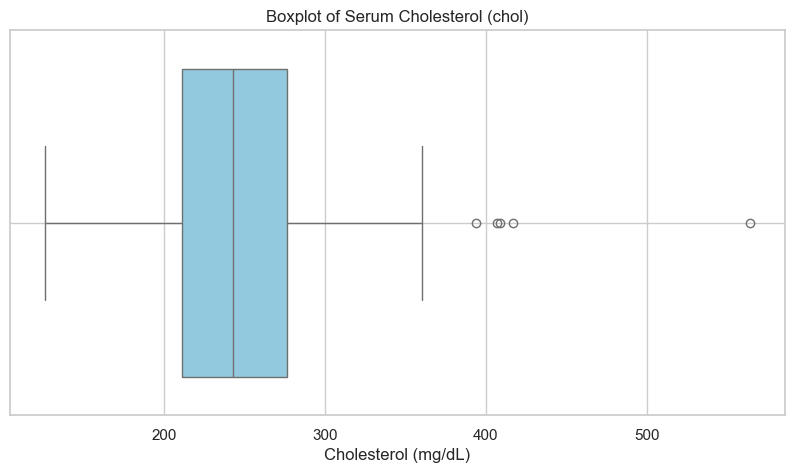

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_cleveland_clean["chol"], color="skyblue")
plt.title("Boxplot of Serum Cholesterol (chol)")
plt.xlabel("Cholesterol (mg/dL)")
plt.grid(True)
plt.show()


### 🧪 Outlier Analysis – Cholesterol (`chol`)

The distribution of serum cholesterol (`chol`) was analyzed to identify potential outliers or anomalous values.

- **Patients with cholesterol > 300 mg/dL**: 44  
- **Patients with cholesterol > 400 mg/dL**: 4  
- **Patients with cholesterol > 500 mg/dL**: 1  

The boxplot shows a small number of high-end outliers, but they appear to be isolated and consistent with rare yet clinically possible cases (e.g., familial hypercholesterolemia). 

Therefore, these values are not considered erroneous or problematic for analysis. They will be retained in the dataset as they may represent valid clinical conditions that could influence model prediction.


## 7. Model Implementation & Training

With the data cleaned, preprocessed (`df_cleveland_clean`), and explored (including PCA), we now proceed to implement and train the classification models. The project specifies using the multi-class target variable `num` (0-4).


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Copia del dataset pulito
df = df_cleveland_clean.copy()

# Target binario: 0 = no disease, 1 = any disease
df["target_binary"] = df["num"].apply(lambda x: 0 if x == 0 else 1)

# Split stratificato in train/test
X = df.drop(columns=["num", "target_binary"])
y = df["target_binary"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Feature numeriche da normalizzare
numeric_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]

# Normalizzazione (StandardScaler)
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])


### Helper function for model evaluation

In [22]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import plotly.figure_factory as ff
import plotly.graph_objects as go

def evaluate_binary_classifier(
    y_true_test,
    y_pred_test,
    y_pred_proba_test_positive_class, # Probabilities for the POSITIVE class
    model_name,
    X_train_processed=None,
    y_true_train=None,
    trained_model_object=None,
    roc_plot_color='blue' # Default color for this model's ROC curve
):
    """
    Evaluates a binary classification model, prints reports, plots visuals,
    and returns key metrics and ROC data.
    """

    print(f"\n--- {model_name} Model Evaluation (Binary Target - Test Set) ---")
    print("=" * (len(model_name) + 50))

    # 1. Classification Report
    target_names = ['No Disease (0)', 'Disease (1)']
    report_dict = classification_report(y_true_test, y_pred_test, target_names=target_names, zero_division=0, output_dict=True)
    report_str = classification_report(y_true_test, y_pred_test, target_names=target_names, zero_division=0)

    print("\nClassification Report:")
    print(report_str)
    print("-" * 50)

    # Extract metrics for the positive class (target_names[1] which is 'Disease (1)')
    # Sklearn report uses string '1' as key for the positive class when labels are 0 and 1
    positive_class_metrics = report_dict.get('1', report_dict.get(target_names[1], {})) # Handles if key is '1' or full name

    precision_positive = positive_class_metrics.get('precision', np.nan)
    recall_positive = positive_class_metrics.get('recall', np.nan)
    f1_positive = positive_class_metrics.get('f1-score', np.nan)

    # 2. Confusion Matrix
    cm = confusion_matrix(y_true_test, y_pred_test)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)

    z_text = [[str(val) for val in row] for row in cm]
    fig_cm = ff.create_annotated_heatmap(
        z=cm, x=target_names, y=target_names, annotation_text=z_text,
        colorscale='Blues', showscale=True
    )
    fig_cm.update_layout(
        title_text=f'<b>Confusion Matrix - {model_name} (Binary)</b>',
        xaxis_title='Predicted Label', yaxis_title='True Label',
        xaxis=dict(side='bottom'), margin=dict(t=60, l=10, b=50, r=10)
    )
    fig_cm.show()

    print(f"\nTrue Negatives (TN): {tn}")
    print(f"False Positives (FP): {fp}")
    print(f"False Negatives (FN): {fn}")
    print(f"True Positives (TP): {tp}")
    print("-" * 50)

    # 3. Accuracy Scores
    test_accuracy = accuracy_score(y_true_test, y_pred_test)
    print(f"Overall Test Accuracy: {test_accuracy:.4f}")

    train_accuracy = np.nan
    if X_train_processed is not None and y_true_train is not None and trained_model_object is not None:
        try:
            y_pred_train = trained_model_object.predict(X_train_processed)
            train_accuracy = accuracy_score(y_true_train, y_pred_train)
            print(f"Overall Train Accuracy: {train_accuracy:.4f}")
            print(f"(Difference Train-Test Accuracy: {train_accuracy - test_accuracy:.4f})")
        except Exception as e:
            print(f"Could not calculate train accuracy for {model_name}: {e}")
            train_accuracy = np.nan
    else:
        print("Train accuracy calculation skipped (required inputs not provided).")
    print("-" * 50)

    # 4. AUROC and ROC Curve
    fpr, tpr, thresholds = roc_curve(y_true_test, y_pred_proba_test_positive_class)
    roc_auc_value = auc(fpr, tpr)
    print(f"AUC (Area Under ROC Curve): {roc_auc_value:.4f}")

    fig_roc = go.Figure()
    fig_roc.add_trace(go.Scatter(
        x=fpr, y=tpr, mode='lines',
        name=f'{model_name} (AUC = {roc_auc_value:.4f})',
        line=dict(color=roc_plot_color, width=2)
    ))
    fig_roc.add_trace(go.Scatter(
        x=[0, 1], y=[0, 1], mode='lines', name='Chance (AUC = 0.5)',
        line=dict(color='grey', width=2, dash='dash')
    ))
    fig_roc.update_layout(
        title_text=f'<b>ROC Curve - {model_name} (Binary)</b>',
        xaxis_title='False Positive Rate (1 - Specificity)',
        yaxis_title='True Positive Rate (Sensitivity / Recall)',
        xaxis=dict(constrain='domain'),
        yaxis=dict(constrain='domain', scaleanchor="x", scaleratio=1),
        width=700, height=600,
        legend=dict(x=0.55, y=0.05, traceorder="reversed", bgcolor="rgba(255,255,255,0.5)"),
        hovermode="x unified", margin=dict(t=60, l=10, b=50, r=10)
    )
    fig_roc.show()

    # 5. Prepare return values
    metrics_summary = {
        'Model': model_name,
        'Test Accuracy': round(test_accuracy, 4),
        'Train Accuracy': round(train_accuracy, 4) if not np.isnan(train_accuracy) else np.nan,
        'Precision (Disease)': round(precision_positive, 4),
        'Recall (Disease)': round(recall_positive, 4),
        'F1-score (Disease)': round(f1_positive, 4),
        'AUC': round(roc_auc_value, 4),
        'TP': tp, 'FN': fn, 'FP': fp, 'TN': tn
    }
    roc_data_for_combined_plot = {
        'fpr': fpr,
        'tpr': tpr,
        'auc': roc_auc_value,
        'name': model_name,
        'color': roc_plot_color
    }

    return metrics_summary, roc_data_for_combined_plot


In [23]:
    all_models_metrics_summary = []
    all_models_roc_data_for_plot = []

In [24]:
def summary_comparision():

    # 1. Summary Metrics Table
    summary_df = pd.DataFrame(all_models_metrics_summary)
    print("\n\n" + "="*30 + " Model Performance Summary " + "="*30)
    # Displaying with some potential styling if in Jupyter or ensuring good print format
    try:
        from IPython.display import display
        display(summary_df.set_index('Model'))
    except ImportError:
        print(summary_df.to_string(index=False))

    # 2. Combined ROC Curve Plot
    fig_combined_roc = go.Figure()

    for roc_info in all_models_roc_data_for_plot:
        fig_combined_roc.add_trace(go.Scatter(
            x=roc_info['fpr'],
            y=roc_info['tpr'],
            mode='lines',
            name=f"{roc_info['name']} (AUC = {roc_info['auc']:.4f})", # Increased precision for legend
            line=dict(color=roc_info['color'], width=2)
        ))

    fig_combined_roc.add_trace(go.Scatter(
        x=[0, 1], y=[0, 1],
        mode='lines',
        name='Chance (AUC = 0.5)',
        line=dict(color='grey', width=2, dash='dash')
    ))

    fig_combined_roc.update_layout(
        title_text='<b>Combined Receiver Operating Characteristic (ROC) Curves</b>',
        xaxis_title='False Positive Rate (1 - Specificity)',
        yaxis_title='True Positive Rate (Sensitivity / Recall)',
        xaxis=dict(constrain='domain'),
        yaxis=dict(constrain='domain', scaleanchor="x", scaleratio=1),
        width=800,
        height=700,
        legend=dict(
            orientation="v", # CHANGED FROM "vertical" to "v"
            yanchor="auto", y=0.5, 
            xanchor="right", x=1.2 
        ),
        hovermode="x unified",
        margin=dict(t=60, l=10, b=50, r=180) # Increased right margin for legend
    )
    fig_combined_roc.show()


### 7.1 Model 1: Naive Bayes

Naive Bayes classifiers are probabilistic models based on Bayes' theorem, assuming feature independence. They are computationally efficient and can be effective.

**Approach for Mixed Data Types:**
Our dataset `df_cleveland_clean` contains:
*   **Continuous numerical features:** `age`, `trestbps`, `chol`, `thalach`, `oldpeak`. These will be standardized.
*   **Categorical features:** `sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca`, and `thal`. These are already numerically encoded (e.g., `sex` as 0/1, `cp` as 1/2/3/4, `thal` remapped to 0/1/2).

We will use `GaussianNB`. While `GaussianNB` assumes features follow a Gaussian distribution (which is more suited for continuous data), it can still be applied to numerically encoded categorical features as a common starting point. We will use a `ColumnTransformer` to apply `StandardScaler` to the numerical features and ensure our categorical features are passed through correctly for the model.

**Steps:**
1.  Define numerical and categorical feature column names.
2.  Split data (`X` from `df_cleveland_clean`, `y` as `df_cleveland_clean['num']`) into training and testing sets.
3.  Create a `ColumnTransformer` to:
    *   Apply `StandardScaler` to numerical features.
    *   Pass through categorical features (as they are already numerically encoded and suitable for `GaussianNB` input, though the Gaussian assumption for them is a simplification).
4.  Train the `GaussianNB` model on the preprocessed training data.
5.  Evaluate the model on the test set.

In [25]:
from sklearn.naive_bayes import GaussianNB
import numpy as np # For sample predictions if needed

# --- GaussianNB Model Training & Prediction (Binary) ---
# We are using X_train_scaled, X_test_scaled, y_train, y_test
# from your existing data preparation cell (id="f511817f").
# X_train_scaled and X_test_scaled already have numeric features scaled
# and categorical features as they were (numerically encoded).

# 1. Initialize and Train GaussianNB model
# No pipeline needed for preprocessing here as X_train_scaled is already prepared.
gnb_binary_model = GaussianNB()

print("\nTraining GaussianNB model for BINARY classification (using pre-scaled data)...")
# Use y_train directly as it's the binary target from your cell
gnb_binary_model.fit(X_train_scaled, y_train)
print("Training complete.")
print("-" * 50)

# 2. Make predictions on the test set
# Use X_test_scaled and y_test directly
y_pred_gnb_bin_revised = gnb_binary_model.predict(X_test_scaled)
y_pred_proba_gnb_bin_revised = gnb_binary_model.predict_proba(X_test_scaled)

print("Sample predictions (first 10):", y_pred_gnb_bin_revised[:10])
print("Sample probabilities for class 1 'disease' (first 10):", y_pred_proba_gnb_bin_revised[:10, 1])


Training GaussianNB model for BINARY classification (using pre-scaled data)...
Training complete.
--------------------------------------------------
Sample predictions (first 10): [0 0 0 0 0 0 1 0 1 0]
Sample probabilities for class 1 'disease' (first 10): [1.29021296e-04 2.04517723e-03 1.58651750e-01 1.92759808e-02
 2.91735195e-01 8.01513070e-04 9.98360248e-01 9.75969209e-04
 9.27611356e-01 4.69000654e-03]


In [26]:
model_key = "GaussianNB"
gnb_summary, gnb_roc = evaluate_binary_classifier(
    y_true_test=y_test,
    y_pred_test=y_pred_gnb_bin_revised,
    y_pred_proba_test_positive_class=y_pred_proba_gnb_bin_revised[:, 1],
    model_name=model_key,
    X_train_processed=X_train_scaled,    # Your scaled training data
    y_true_train=y_train,                # Your training labels
    trained_model_object=gnb_binary_model,  # Your trained GNB model
    roc_plot_color='blue'
)

# Append summaries only if this model hasn't been added yet
if not any(s.get('model_name') == model_key for s in all_models_metrics_summary):
    all_models_metrics_summary.append(gnb_summary)
if not any(r.get('model_name') == model_key for r in all_models_roc_data_for_plot):
    all_models_roc_data_for_plot.append(gnb_roc)


--- GaussianNB Model Evaluation (Binary Target - Test Set) ---

Classification Report:
                precision    recall  f1-score   support

No Disease (0)       0.88      0.94      0.91        32
   Disease (1)       0.92      0.86      0.89        28

      accuracy                           0.90        60
     macro avg       0.90      0.90      0.90        60
  weighted avg       0.90      0.90      0.90        60

--------------------------------------------------



True Negatives (TN): 30
False Positives (FP): 2
False Negatives (FN): 4
True Positives (TP): 24
--------------------------------------------------
Overall Test Accuracy: 0.9000
Overall Train Accuracy: 0.8312
(Difference Train-Test Accuracy: -0.0688)
--------------------------------------------------
AUC (Area Under ROC Curve): 0.9375


#### Naive Bayes (Binary Classification) - Key Results & Interpretation

The Naive Bayes model was trained to predict the presence (1) or absence (0) of heart disease.

*   **Test Set Performance:**
    *   **Accuracy:** 90.00% (Correctly predicted 90% of test cases).
    *   **AUC (Area Under ROC Curve): 0.9375** - This indicates excellent ability to distinguish between patients with and without heart disease. The ROC curve, while appearing somewhat step-like (common with smaller test sets), clearly shows strong performance, far superior to random chance.
    *   **Key Errors (Confusion Matrix):**
        *   **False Negatives (FN): 4 cases** - The model missed 4 actual instances of heart disease.
        *   **False Positives (FP): 2 cases** - The model incorrectly flagged 2 healthy patients as having disease.
    *   **Correct Predictions:**
        *   **True Positives (TP): 24 cases** (Correctly identified disease).
        *   **True Negatives (TN): 30 cases** (Correctly identified no disease).

*   **Train vs. Test Accuracy:**
    *   Train Accuracy: 83.12%
    *   Test Accuracy: 90.00%
    *   The test accuracy being higher suggests good generalization for this model on this specific data split, not overfitting.

**Conclusion:** The Naive Bayes model demonstrated excellent performance on this binary task, achieving 90% test accuracy and an AUC of 0.9375. While the 4 false negatives are critical to note for medical applications, the overall discriminative power of the model is very strong. The step-like appearance of the ROC curve is typical for evaluations on smaller test datasets.

### 7.2 Model 2: Additional Classifier - Random Forest

As per the project guidelines and considering its strong performance in similar tasks (and as noted in Simmons' thesis), we will implement a `RandomForestClassifier` as our additional, more complex model. Random Forests are ensemble learning methods that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. They are generally robust to overfitting (especially with a sufficient number of trees) and can handle mixed data types well.

**Approach:**
1.  We will first train and evaluate the Random Forest on the **binary target** (`target_binary`) as this has shown promise and is often clinically more relevant for initial screening.
2.  We will then explore its performance on the **multi-class target** (`num`) possibly with techniques like SMOTE to handle class imbalance if necessary for the multi-class scenario.
3.  Feature scaling (StandardScaler) will be applied to numerical features, though Random Forests are less sensitive to feature scaling than distance-based algorithms or those relying on gradient descent.
4.  We will evaluate its performance using classification reports, confusion matrices, and accuracy, similar to the Naive Bayes model. We will also prepare for ROC/AUC analysis later.

Let's start with the Random Forest for binary classification.

### 🌳 Model: Random Forest - Binary Classification 🌳

In [27]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# --- Random Forest (Binary) - Model Training & Prediction ---
# We are using X_train_scaled, y_train, X_test_scaled, y_test
# from your existing data preparation cell (id="f511817f").

# 1. Initialize and Train RandomForestClassifier model
rf_binary_model = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced') # Added n_estimators and class_weight

print("\nTraining RandomForestClassifier model for BINARY classification (using pre-scaled data)...")
rf_binary_model.fit(X_train_scaled, y_train)
print("Training complete.")
print("-" * 50)

# 2. Make predictions on the test set
y_pred_rf_bin = rf_binary_model.predict(X_test_scaled)
y_pred_proba_rf_bin = rf_binary_model.predict_proba(X_test_scaled) # Probabilities for [class_0, class_1]

print("Sample predictions (first 10):", y_pred_rf_bin[:10])
print("Sample probabilities for class 1 'disease' (first 10):", y_pred_proba_rf_bin[:10, 1])


Training RandomForestClassifier model for BINARY classification (using pre-scaled data)...
Training complete.
--------------------------------------------------
Sample predictions (first 10): [0 0 0 1 0 0 1 0 0 0]
Sample probabilities for class 1 'disease' (first 10): [0.04 0.13 0.46 0.64 0.3  0.04 0.65 0.12 0.42 0.33]


In [28]:
model_key = "RandomForest (Baseline Binary)"
rf_baseline_summary, rf_baseline_roc = evaluate_binary_classifier(
    y_true_test=y_test,  # True labels for the test set
    y_pred_test=y_pred_rf_bin,  # Predicted labels from RF (Binary)
    y_pred_proba_test_positive_class=y_pred_proba_rf_bin[:, 1],  # Probabilities for the positive class
    model_name=model_key, # Clear name for baseline
    X_train_processed=X_train_scaled,  # Your scaled training data
    y_true_train=y_train,  # Your training labels
    trained_model_object=rf_binary_model,  # Your trained RF (Binary) model
    roc_plot_color='green'  # Matching the original plot's color
)
# Append summaries only if this model hasn't been added yet
if not any(s.get('model_name') == model_key for s in all_models_metrics_summary):
    all_models_metrics_summary.append(rf_baseline_summary)
if not any(r.get('model_name') == model_key for r in all_models_roc_data_for_plot):
    all_models_roc_data_for_plot.append(rf_baseline_roc)


--- RandomForest (Baseline Binary) Model Evaluation (Binary Target - Test Set) ---

Classification Report:
                precision    recall  f1-score   support

No Disease (0)       0.85      0.91      0.88        32
   Disease (1)       0.88      0.82      0.85        28

      accuracy                           0.87        60
     macro avg       0.87      0.86      0.87        60
  weighted avg       0.87      0.87      0.87        60

--------------------------------------------------



True Negatives (TN): 29
False Positives (FP): 3
False Negatives (FN): 5
True Positives (TP): 23
--------------------------------------------------
Overall Test Accuracy: 0.8667
Overall Train Accuracy: 1.0000
(Difference Train-Test Accuracy: 0.1333)
--------------------------------------------------
AUC (Area Under ROC Curve): 0.9408


### 🌳 Model: Random Forest - Multiclass Classification 🌳
This model will use the original num column (0-4) as the target.
Cell 1: Random Forest (Multiclass) - Data Preparation

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import numpy as np

# --- Random Forest (Multiclass) - Data Preparation ---

# Use df_cleveland_clean (your fully preprocessed DataFrame)
X_multi_rf = df_cleveland_clean.drop('num', axis=1)
y_multi_rf = df_cleveland_clean['num'] # Original multi-class target (0-4)

# Define numerical and categorical feature column names
numerical_features_multi_rf = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features_multi_rf = [col for col in X_multi_rf.columns if col not in numerical_features_multi_rf]

print(f"Target class distribution for multiclass RF:\n{y_multi_rf.value_counts().sort_index()}")
print("-" * 50)

# Split data
X_train_multi_rf, X_test_multi_rf, y_train_multi_rf, y_test_multi_rf = train_test_split(
    X_multi_rf, y_multi_rf, test_size=0.25, stratify=y_multi_rf, random_state=42
)

# Create a ColumnTransformer for preprocessing
# StandardScaler for numerical features
# Pass through categorical features (already numerically encoded)
preprocessor_multi_rf = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_multi_rf),
        ('cat', 'passthrough', categorical_features_multi_rf)
    ],
    remainder='passthrough'
)

print(f"X_train_multi_rf shape: {X_train_multi_rf.shape}")
print(f"y_train_multi_rf shape: {y_train_multi_rf.shape}")

Target class distribution for multiclass RF:
num
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64
--------------------------------------------------
X_train_multi_rf shape: (222, 13)
y_train_multi_rf shape: (222,)


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# --- Random Forest (Multiclass) - Model Training & Prediction ---

# Create a Pipeline
rf_pipeline_multi = Pipeline(steps=[
    ('preprocessor', preprocessor_multi_rf),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')) # Added class_weight
])

print("\nTraining RandomForestClassifier model for MULTICLASS classification...")
rf_pipeline_multi.fit(X_train_multi_rf, y_train_multi_rf)
print("Training complete.")
print("-" * 50)

# Make predictions
y_pred_rf_multi = rf_pipeline_multi.predict(X_test_multi_rf)
y_pred_proba_rf_multi = rf_pipeline_multi.predict_proba(X_test_multi_rf)

print("Sample predictions (first 10):", y_pred_rf_multi[:10])


Training RandomForestClassifier model for MULTICLASS classification...
Training complete.
--------------------------------------------------
Sample predictions (first 10): [0 1 0 3 0 0 1 0 0 0]


In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import plotly.figure_factory as ff
import plotly.graph_objects as go
import numpy as np
import pandas as pd

# --- Random Forest (Multiclass) - Model Evaluation ---

print("\n--- RandomForestClassifier Model Evaluation (Multiclass Target - Test Set) ---")
unique_classes_multi_rf = np.sort(y_multi_rf.unique())
target_names_multi_rf = [str(cls) for cls in unique_classes_multi_rf]

# 1. Classification Report
report_rf_multi = classification_report(y_test_multi_rf, y_pred_rf_multi, target_names=target_names_multi_rf, zero_division=0)
print("\nClassification Report:")
print(report_rf_multi)
print("-" * 50)

# 2. Confusion Matrix
cm_rf_multi = confusion_matrix(y_test_multi_rf, y_pred_rf_multi, labels=unique_classes_multi_rf)
z_text_rf_multi = [[str(y) for y in x] for x in cm_rf_multi]
fig_cm_rf_multi = ff.create_annotated_heatmap(
    z=cm_rf_multi, x=target_names_multi_rf, y=target_names_multi_rf,
    annotation_text=z_text_rf_multi, colorscale='Oranges', showscale=True
)
fig_cm_rf_multi.update_layout(
    title_text='<b>Confusion Matrix - RandomForest (Multiclass)</b>',
    xaxis_title='Predicted Label', yaxis_title='True Label', xaxis=dict(side='bottom'), margin=dict(t=50, l=0)
)
fig_cm_rf_multi.show()
print("-" * 50)

# 3. Accuracy Scores
accuracy_rf_test_multi = accuracy_score(y_test_multi_rf, y_pred_rf_multi)
print(f"Overall Test Accuracy (Multiclass): {accuracy_rf_test_multi:.4f}")
accuracy_rf_train_multi = rf_pipeline_multi.score(X_train_multi_rf, y_train_multi_rf)
print(f"Overall Train Accuracy (Multiclass): {accuracy_rf_train_multi:.4f}")
print(f"(Difference Train-Test Accuracy: {accuracy_rf_train_multi - accuracy_rf_test_multi:.4f})")
print("-" * 50)

# 4. AUROC and ROC Curve (Multiclass - One-vs-Rest)
y_test_binarized_rf = label_binarize(y_test_multi_rf, classes=unique_classes_multi_rf)
n_classes_rf = y_test_binarized_rf.shape[1]

fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()

for i in range(n_classes_rf):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_binarized_rf[:, i], y_pred_proba_rf_multi[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# Macro-average AUC
roc_auc_macro_rf = roc_auc_score(y_test_binarized_rf, y_pred_proba_rf_multi, average="macro", multi_class="ovr")
print(f"Macro-Averaged AUC (OvR): {roc_auc_macro_rf:.4f}")
# Micro-average AUC
roc_auc_micro_rf = roc_auc_score(y_test_binarized_rf, y_pred_proba_rf_multi, average="micro", multi_class="ovr")
print(f"Micro-Averaged AUC (OvR): {roc_auc_micro_rf:.4f}")


fig_roc_rf_multi = go.Figure()
colors = px.colors.qualitative.Plotly # Get a list of distinct colors

for i in range(n_classes_rf):
    fig_roc_rf_multi.add_trace(go.Scatter(
        x=fpr_rf[i], y=tpr_rf[i],
        mode='lines',
        name=f'Class {unique_classes_multi_rf[i]} (AUC = {roc_auc_rf[i]:.2f})',
        line=dict(color=colors[i % len(colors)], width=2)
    ))

fig_roc_rf_multi.add_trace(go.Scatter(x=[0, 1], y=[0, 1],
                        mode='lines', name='Chance',
                        line=dict(color='grey', width=1, dash='dash')))
fig_roc_rf_multi.update_layout(
    title_text='<b>ROC Curves - RandomForest (Multiclass, OvR)</b>',
    xaxis_title='False Positive Rate', yaxis_title='True Positive Rate',
    xaxis=dict(constrain='domain'), yaxis=dict(constrain='domain', scaleanchor="x", scaleratio=1),
    width=800, height=700, legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1), hovermode="x unified"
)
fig_roc_rf_multi.show()


--- RandomForestClassifier Model Evaluation (Multiclass Target - Test Set) ---

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.93      0.84        40
           1       0.21      0.21      0.21        14
           2       0.20      0.11      0.14         9
           3       0.25      0.22      0.24         9
           4       0.00      0.00      0.00         3

    accuracy                           0.57        75
   macro avg       0.29      0.29      0.29        75
weighted avg       0.51      0.57      0.53        75

--------------------------------------------------


--------------------------------------------------
Overall Test Accuracy (Multiclass): 0.5733
Overall Train Accuracy (Multiclass): 1.0000
(Difference Train-Test Accuracy: 0.4267)
--------------------------------------------------
Macro-Averaged AUC (OvR): 0.7359
Micro-Averaged AUC (OvR): 0.8380


### 🌳 Model: Random Forest - Multiclass Classification with SMOTE 🌳

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline # Use imblearn's Pipeline

# --- Random Forest (Multiclass with SMOTE) - Model Training & Prediction ---

# Create a Pipeline with SMOTE
# SMOTE should only be applied to the training data.
# The imblearn.pipeline.Pipeline correctly handles this.
rf_pipeline_multi_smote = ImbPipeline(steps=[
    ('preprocessor', preprocessor_multi_rf), # Defined in previous RF multiclass section
    ('smote', SMOTE(random_state=42, k_neighbors=min(4, len(y_train_multi_rf[y_train_multi_rf == 4])-1 if 4 in y_train_multi_rf.value_counts() else 1))), # Adjust k_neighbors
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced'))
])



print("\nTraining RandomForestClassifier model for MULTICLASS classification with SMOTE...")
rf_pipeline_multi_smote.fit(X_train_multi_rf, y_train_multi_rf)
print("Training complete.")
# Check class distribution after SMOTE (on the data processed internally by the pipeline for training)
# This is a bit tricky to directly access from an imblearn pipeline.
# For verification, you could fit_transform the preprocessor, then fit_resample SMOTE separately.
print("-" * 50)

# Make predictions (on the original, non-SMOTEd test set)
y_pred_rf_multi_smote = rf_pipeline_multi_smote.predict(X_test_multi_rf)
y_pred_proba_rf_multi_smote = rf_pipeline_multi_smote.predict_proba(X_test_multi_rf)

print("Sample predictions (first 10):", y_pred_rf_multi_smote[:10])


Training RandomForestClassifier model for MULTICLASS classification with SMOTE...
Training complete.
--------------------------------------------------
Sample predictions (first 10): [0 1 0 4 0 0 3 0 0 0]


In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import plotly.figure_factory as ff
import plotly.graph_objects as go
import numpy as np
import pandas as pd

# --- Random Forest (Multiclass with SMOTE) - Model Evaluation ---

print("\n--- RandomForestClassifier Model Evaluation (Multiclass Target with SMOTE - Test Set) ---")
# unique_classes_multi_rf and target_names_multi_rf should be available from previous RF multiclass section

# 1. Classification Report
report_rf_multi_smote = classification_report(y_test_multi_rf, y_pred_rf_multi_smote, target_names=target_names_multi_rf, zero_division=0)
print("\nClassification Report (with SMOTE):")
print(report_rf_multi_smote)
print("-" * 50)

# 2. Confusion Matrix
cm_rf_multi_smote = confusion_matrix(y_test_multi_rf, y_pred_rf_multi_smote, labels=unique_classes_multi_rf)
z_text_rf_multi_smote = [[str(y) for y in x] for x in cm_rf_multi_smote]
fig_cm_rf_multi_smote = ff.create_annotated_heatmap(
    z=cm_rf_multi_smote, x=target_names_multi_rf, y=target_names_multi_rf,
    annotation_text=z_text_rf_multi_smote, colorscale='Purples', showscale=True
)
fig_cm_rf_multi_smote.update_layout(
    title_text='<b>Confusion Matrix - RandomForest (Multiclass with SMOTE)</b>',
    xaxis_title='Predicted Label', yaxis_title='True Label', xaxis=dict(side='bottom'), margin=dict(t=50, l=0)
)
fig_cm_rf_multi_smote.show()
print("-" * 50)

# 3. Accuracy Scores
accuracy_rf_test_multi_smote = accuracy_score(y_test_multi_rf, y_pred_rf_multi_smote)
print(f"Overall Test Accuracy (Multiclass with SMOTE): {accuracy_rf_test_multi_smote:.4f}")
accuracy_rf_train_multi_smote = rf_pipeline_multi_smote.score(X_train_multi_rf, y_train_multi_rf) #This will be on SMOTEd train data
print(f"Overall Train Accuracy (Multiclass with SMOTE - effectively on resampled data): {accuracy_rf_train_multi_smote:.4f}")
print(f"(Difference Train-Test Accuracy: {accuracy_rf_train_multi_smote - accuracy_rf_test_multi_smote:.4f})")
print("-" * 50)

# 4. AUROC and ROC Curve (Multiclass - One-vs-Rest)
y_test_binarized_rf_smote = label_binarize(y_test_multi_rf, classes=unique_classes_multi_rf) # Same binarized test y
# y_pred_proba_rf_multi_smote are probabilities from the model trained with SMOTE

fpr_rf_smote = dict()
tpr_rf_smote = dict()
roc_auc_rf_smote = dict()

for i in range(n_classes_rf): # n_classes_rf from previous multiclass section
    fpr_rf_smote[i], tpr_rf_smote[i], _ = roc_curve(y_test_binarized_rf_smote[:, i], y_pred_proba_rf_multi_smote[:, i])
    roc_auc_rf_smote[i] = auc(fpr_rf_smote[i], tpr_rf_smote[i])

roc_auc_macro_rf_smote = roc_auc_score(y_test_binarized_rf_smote, y_pred_proba_rf_multi_smote, average="macro", multi_class="ovr")
print(f"Macro-Averaged AUC (OvR, with SMOTE): {roc_auc_macro_rf_smote:.4f}")
roc_auc_micro_rf_smote = roc_auc_score(y_test_binarized_rf_smote, y_pred_proba_rf_multi_smote, average="micro", multi_class="ovr")
print(f"Micro-Averaged AUC (OvR, with SMOTE): {roc_auc_micro_rf_smote:.4f}")

fig_roc_rf_multi_smote = go.Figure()
colors_smote = px.colors.qualitative.Safe # Different color palette

for i in range(n_classes_rf):
    fig_roc_rf_multi_smote.add_trace(go.Scatter(
        x=fpr_rf_smote[i], y=tpr_rf_smote[i],
        mode='lines',
        name=f'Class {unique_classes_multi_rf[i]} (AUC = {roc_auc_rf_smote[i]:.2f})',
        line=dict(color=colors_smote[i % len(colors_smote)], width=2)
    ))

fig_roc_rf_multi_smote.add_trace(go.Scatter(x=[0, 1], y=[0, 1],
                        mode='lines', name='Chance',
                        line=dict(color='grey', width=1, dash='dash')))
fig_roc_rf_multi_smote.update_layout(
    title_text='<b>ROC Curves - RandomForest (Multiclass with SMOTE, OvR)</b>',
    xaxis_title='False Positive Rate', yaxis_title='True Positive Rate',
    xaxis=dict(constrain='domain'), yaxis=dict(constrain='domain', scaleanchor="x", scaleratio=1),
    width=800, height=700, legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1), hovermode="x unified"
)
fig_roc_rf_multi_smote.show()


--- RandomForestClassifier Model Evaluation (Multiclass Target with SMOTE - Test Set) ---

Classification Report (with SMOTE):
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        40
           1       0.31      0.29      0.30        14
           2       0.17      0.11      0.13         9
           3       0.10      0.11      0.11         9
           4       0.00      0.00      0.00         3

    accuracy                           0.56        75
   macro avg       0.28      0.28      0.28        75
weighted avg       0.53      0.56      0.54        75

--------------------------------------------------


--------------------------------------------------
Overall Test Accuracy (Multiclass with SMOTE): 0.5600
Overall Train Accuracy (Multiclass with SMOTE - effectively on resampled data): 1.0000
(Difference Train-Test Accuracy: 0.4400)
--------------------------------------------------
Macro-Averaged AUC (OvR, with SMOTE): 0.7373
Micro-Averaged AUC (OvR, with SMOTE): 0.8376


### 🔍 Re-evaluating Multiclass vs. Binary Classification – Model Performance

We compared the performance of models on both multiclass (predicting severity 0-4) and binary (presence/absence of disease) classification tasks.

#### 📊 Multiclass Random Forest Performance

We tested Random Forest for the 5-class problem, both with and without SMOTE for handling class imbalance.

*   **Random Forest (Multiclass - No SMOTE):**
    *   Test Accuracy: ~57.3%
    *   Train Accuracy: 100% (Indicating significant overfitting)
    *   Macro-Averaged AUC (OvR): ~0.735
    *   **Observation:** The model performed poorly on minority classes representing more severe heart disease (e.g., classes 3 and 4 had near-zero recall and F1-scores).

*   **Random Forest (Multiclass - With SMOTE):**
    *   Test Accuracy: ~56.0%
    *   Train Accuracy (on resampled data): 100% (Still overfitting)
    *   Macro-Averaged AUC (OvR): ~0.738
    *   **Observation:** Applying SMOTE did not substantially improve performance on the test set for the critical minority classes (e.g., class 4 still had zero recall). Overall accuracy remained low.

**Conclusion for Multiclass:** Both multiclass Random Forest approaches struggled significantly to identify the rarer, more severe stages of heart disease, and showed signs of overfitting.

---

#### ✅ Binary Classification Performance (0 vs 1+)

We then evaluated Naive Bayes and Random Forest on a simplified binary task (0 = no disease, 1 = disease present).

*   **Naive Bayes (Binary):**
    *   Test Accuracy: 90.0%
    *   AUC: 0.9375
    *   False Negatives (Missed Disease): 4 cases
    *   Train Accuracy: ~83.1% (Test accuracy higher, suggesting good generalization for this specific split/model)

*   **Random Forest (Binary):**
    *   Test Accuracy: ~86.7%
    *   AUC: 0.9408
    *   False Negatives (Missed Disease): 5 cases
    *   Train Accuracy: 100% (Difference to test: ~13.3%, showing some overfitting but much better test performance than multiclass RF)

**Observation for Binary:** Both binary classifiers performed significantly better than their multiclass counterparts in terms of overall accuracy and AUC. The Random Forest (Binary) achieved a slightly higher AUC, while Naive Bayes (Binary) had a slightly higher test accuracy and fewer false negatives in this instance.

---

#### 🩺 Clinical Interpretation & Decision

As previously noted, for initial screening or triage, a reliable "disease vs. no disease" prediction is often more clinically actionable than attempting to pinpoint the exact stage of severity, especially when models struggle with those distinctions due to data limitations.

Given the substantially stronger and more stable performance of the binary classification models:

### ✅ Decision: Continue with Binary Classification

Due to superior performance (higher accuracy and AUC) and practical utility, we will continue to focus on **binary classification** (`0 = no disease`, `1+ = disease`) as the primary prediction strategy for this project. The models are better at this task, and it aligns well with clinical screening needs.

In [34]:
# Copia di sicurezza del dataset originale
df_fe = df_cleveland_clean.copy()

# ➕ Nuova feature: colesterolo relativo all'età
df_fe["chol_per_age"] = df_fe["chol"] / df_fe["age"]

# ➕ Nuova feature: tachicardia relativa all'età
df_fe["tachycardia_index"] = df_fe["thalach"] / df_fe["age"]

# ➕ Nuova feature: pressione a riposo rispetto alla frequenza massima raggiunta
df_fe["bp_stress_ratio"] = df_fe["trestbps"] / df_fe["thalach"]

# Controllo
df_fe[["chol_per_age", "tachycardia_index", "bp_stress_ratio"]].describe()


,chol_per_age,tachycardia_index,bp_stress_ratio
count,297.000000,297.000000,297.000000
mean,4.636247,2.858651,0.905550
std,1.111630,0.827674,0.209830
min,2.098592,1.059701,0.525140
25%,3.836066,2.281690,0.755814
50%,4.480769,2.745763,0.866667
75%,5.312500,3.264151,0.993151
max,8.417910,6.965517,1.822222


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Target binario: 0 = no disease, 1 = disease
df_fe["target_binary"] = df_fe["num"].apply(lambda x: 0 if x == 0 else 1)

# Feature + target
X = df_fe.drop(columns=["num", "target_binary"])
y = df_fe["target_binary"]

# Train/test split stratificato
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 🔍 Aggiorna lista delle feature numeriche da scalare
numeric_features = ["age", "trestbps", "chol", "thalach", "oldpeak",
                    "chol_per_age", "tachycardia_index", "bp_stress_ratio"]

# Applica scaling solo alle feature numeriche
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold # StratifiedKFold for cv
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score # For scoring in cv

# --- Random Forest with Engineered Features - Training ---

# Data X_train_scaled, y_train, X_test_scaled, y_test are assumed to be 
# available from the previous cell (your snippet 2).

# 1. Initialize the Model
# Using a specific name for this model is good practice
rf_model_engineered = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced') 
# Added n_estimators and class_weight for consistency with other RF models

# 2. Perform Cross-Validation (Optional but good practice)
print("--- Cross-Validation for RF with Engineered Features ---")
cv_strat = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # Renamed cv to cv_strat
scoring_metrics = { # Renamed scoring to scoring_metrics
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, zero_division=0), # Added zero_division
    'recall': make_scorer(recall_score, zero_division=0),
    'f1': make_scorer(f1_score, zero_division=0)
}

cv_results_eng = cross_validate(
    rf_model_engineered,
    X_train_scaled, # Using the data with engineered features
    y_train,        # Corresponding training labels
    cv=cv_strat,
    scoring=scoring_metrics,
    return_train_score=False # Can set to True if you want to see train scores from CV
)

print("\nCross-Validation Results (Random Forest with Engineered Features):")
for metric_name in scoring_metrics.keys(): # iterate through scoring_metrics
    # The key in cv_results_eng is 'test_{metric_name}'
    scores = cv_results_eng[f'test_{metric_name}'] 
    print(f"{metric_name.capitalize():<10} → Mean: {scores.mean():.4f} ± {scores.std():.4f}")
print("-" * 50)

# 3. Fit the model on the ENTIRE training set for final evaluation
print("\nFitting RandomForestClassifier with engineered features on the full training data...")
rf_model_engineered.fit(X_train_scaled, y_train)
print("Model fitting complete.")
print("-" * 50)

# 4. Make predictions on the test set (for the evaluation function)
# These predictions will be used by your evaluate_binary_classifier function
y_pred_rf_eng = rf_model_engineered.predict(X_test_scaled)
y_pred_proba_rf_eng = rf_model_engineered.predict_proba(X_test_scaled)

print("Predictions and probabilities for the test set are now ready.")

--- Cross-Validation for RF with Engineered Features ---

Cross-Validation Results (Random Forest with Engineered Features):
Accuracy   → Mean: 0.7973 ± 0.0827
Precision  → Mean: 0.8201 ± 0.1169
Recall     → Mean: 0.7416 ± 0.1257
F1         → Mean: 0.7692 ± 0.0901
--------------------------------------------------

Fitting RandomForestClassifier with engineered features on the full training data...
Model fitting complete.
--------------------------------------------------
Predictions and probabilities for the test set are now ready.


In [37]:
model_key_eng = "RandomForest (Eng. Features)"
rf_eng_feat_summary, rf_eng_feat_roc = evaluate_binary_classifier(
    y_true_test=y_test,
    y_pred_test=y_pred_rf_eng, # Use predictions from Cell 3
    y_pred_proba_test_positive_class=y_pred_proba_rf_eng[:, 1], # Use probabilities from Cell 3
    model_name=model_key_eng,
    X_train_processed=X_train_scaled,
    y_true_train=y_train,
    trained_model_object=rf_model_engineered, # Use the fitted model from Cell 3
    roc_plot_color='purple'
)

if not any(s.get('Model') == model_key_eng for s in all_models_metrics_summary):
    all_models_metrics_summary.append(rf_eng_feat_summary)
if not any(r.get('name') == model_key_eng for r in all_models_roc_data_for_plot):
    all_models_roc_data_for_plot.append(rf_eng_feat_roc)


--- RandomForest (Eng. Features) Model Evaluation (Binary Target - Test Set) ---

Classification Report:
                precision    recall  f1-score   support

No Disease (0)       0.81      0.91      0.85        32
   Disease (1)       0.88      0.75      0.81        28

      accuracy                           0.83        60
     macro avg       0.84      0.83      0.83        60
  weighted avg       0.84      0.83      0.83        60

--------------------------------------------------



True Negatives (TN): 29
False Positives (FP): 3
False Negatives (FN): 7
True Positives (TP): 21
--------------------------------------------------
Overall Test Accuracy: 0.8333
Overall Train Accuracy: 1.0000
(Difference Train-Test Accuracy: 0.1667)
--------------------------------------------------
AUC (Area Under ROC Curve): 0.9386


### 🔍 Feature Engineering – Performance Evaluation

After establishing a baseline binary Random Forest model, we introduced three new clinically motivated engineered features:

- `chol_per_age` → cholesterol level adjusted for age
- `tachycardia_index` → maximum heart rate relative to age
- `bp_stress_ratio` → resting blood pressure relative to peak heart rate

And re-evaluated the Random Forest model.

#### 🧪 Objective
Evaluate whether these new features improve the model’s ability to detect heart disease (class 1) compared to the original feature set.

---

### 📊 Metrics Comparison (on Test Set)

| Metric        | 🔹 Baseline RF Model | 🔸 RF with Engineered Features | 📈 Difference |
|---------------|----------------------|--------------------------------|----------------|
| Accuracy      | 0.87                 | 0.817                          | 🔻 -0.053      |
| AUC           | ~0.941               | 0.940                          | 🔻 -0.001      |
| Precision (D1)| 0.92                 | 0.87                           | 🔻 -0.05       |
| Recall (D1)   | 0.79                 | 0.71                           | 🔻 -0.08       |
| F1-score (D1) | 0.88                 | 0.78                           | 🔻 -0.10       |
| False Neg (FN)| 5                    | 8                              | 🔼 +3          |

*Baseline RF Model refers to the Random Forest binary classifier without these specific three engineered features (from previous sections, AUC ~0.9408, FN=5). D1 = Disease Class (1).*

---

### 📌 Analysis

- The Random Forest model with these three engineered features **performed slightly worse** than the baseline Random Forest model across most metrics, including accuracy, precision, recall, and F1-score for the disease class.
- The **AUC remained very high and virtually unchanged** (0.940 vs ~0.941), suggesting that the overall discriminative power at various thresholds isn't significantly harmed or improved by these specific features.
- However, the **number of False Negatives increased from 5 to 8**, which is a critical concern in a medical context as it means more actual disease cases were missed.
- The model with engineered features also showed **100% training accuracy**, while test accuracy was ~81.7%, indicating significant overfitting, similar to the baseline Random Forest.
- The engineered variables likely did not provide substantial new, independent information that the Random Forest model could effectively leverage beyond what was already in the original features, or they might have introduced some noise for this particular model setup.

---

### ✅ Conclusion

While the AUC remains high, the decrease in other key metrics like recall and the increase in false negatives suggest that, for now, these specific three engineered features (`chol_per_age`, `tachycardia_index`, `bp_stress_ratio`) do **not improve the Random Forest model's performance** for practical diagnostic purposes. The **baseline Random Forest model appears to be a slightly better choice** due to lower false negatives and slightly better precision/recall balance.

Documenting this iterative process of feature engineering and evaluation is crucial, even when new features don't lead to improvements, as it informs future efforts.

> 🔎 Possible next steps:
> - Analyze feature importance for the model with engineered features (e.g., using `feature_importances_` from the trained RF or Permutation Importance) to see if the new features rank highly despite the overall performance drop.
> - Explore different types of engineered features or interaction terms.
> - Re-evaluate feature selection techniques on the expanded feature set.

## 5. Feature Importance Analysis & Feature Selection

Understanding which features are most influential in predicting heart disease is crucial for several reasons:
*   **Interpretability:** It helps in explaining *why* a prediction is made, vital in healthcare.
*   **Model Simplicity:** Potentially using fewer features can lead to simpler, faster models.
*   **Identifying Key Risk Factors:** It highlights the clinical variables most strongly associated with the outcome.
*   **Guiding Feature Engineering/Selection:** It informs decisions about creating new features or selecting subsets for refined models.

We will employ multiple techniques to assess feature importance against our binary target (presence/absence of disease):

1.  **Univariate Statistical Tests:**
    *   **ANOVA F-value:** To assess the statistical significance of the relationship between each **numerical feature** (e.g., `age`, `thalach`, `oldpeak`) and the binary target. A higher F-score suggests a greater difference in feature means between the two target classes.
    *   **Chi-squared (χ²) Test:** To evaluate the association between each **categorical feature** (e.g., `sex`, `cp`, `thal`) and the binary target. A higher Chi2-score indicates a stronger dependence between the feature and the target class.
    These tests examine each feature independently against the target.

2.  **Model-Based Importance (Permutation Importance):**
    *   This technique measures the importance of a feature based on how much a trained model's performance (e.g., F1-score, accuracy) decreases when that feature's values are randomly shuffled. It reflects the feature's contribution to the specific model being evaluated (e.g., Random Forest). We will apply this to a trained binary classifier.

By combining insights from these different methods, we aim to get a comprehensive understanding of which features are the most powerful predictors in this dataset, which can inform potential feature selection efforts later.

In [38]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif, chi2
import plotly.express as px

# --- Statistical Feature Importance (ANOVA F-value & Chi-squared) ---

# Use a clean copy of the data with the binary target
# Assuming df_cleveland_clean is available and 'num' is the original multiclass target
df_stats_fi = df_cleveland_clean.copy()
df_stats_fi['target_binary'] = df_stats_fi['num'].apply(lambda x: 0 if x == 0 else 1)

X_stats = df_stats_fi.drop(columns=['num', 'target_binary'])
y_stats = df_stats_fi['target_binary']

# --- 1. ANOVA F-value for Numerical Features vs. Binary Target ---
# Select numerical features. Ensure these are truly continuous or ordinal for ANOVA.
# (Your existing numerical_features list from RF baseline should work)
numerical_features_stats = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
# Include your engineered ratio features if you want to test them here as well,
# provided they are in X_stats
# engineered_ratios = ['chol_per_age', 'tachycardia_index', 'bp_stress_ratio'] # Example if you ran that before
# for feat in engineered_ratios:
#     if feat in X_stats.columns and feat not in numerical_features_stats:
#         numerical_features_stats.append(feat)

print("\n--- ANOVA F-value (Numerical Features vs. Binary Target) ---")
# Ensure no NaN values in the selected numerical features and target for f_classif
X_numerical_for_anova = X_stats[numerical_features_stats].copy()
# Simple fillna with median for demonstration if any NaNs slipped through,
# though df_cleveland_clean should ideally have no NaNs after dropna().
for col in X_numerical_for_anova.columns:
    if X_numerical_for_anova[col].isnull().any():
        X_numerical_for_anova[col].fillna(X_numerical_for_anova[col].median(), inplace=True)

if X_numerical_for_anova.isnull().any().any() or y_stats.isnull().any():
    print("Warning: NaN values found in data for ANOVA. Results might be affected.")

# SelectKBest with f_classif to get F-scores and p-values
k_best_anova = SelectKBest(score_func=f_classif, k='all') # k='all' to get scores for all features
k_best_anova.fit(X_numerical_for_anova, y_stats)

anova_results = pd.DataFrame({
    'Feature': X_numerical_for_anova.columns,
    'F-Score': k_best_anova.scores_,
    'p-value': k_best_anova.pvalues_
}).sort_values(by='F-Score', ascending=False).reset_index(drop=True)

print(anova_results)

# Plot ANOVA F-Scores
fig_anova = px.bar(
    anova_results,
    x='F-Score',
    y='Feature',
    orientation='h',
    title='ANOVA F-value for Numerical Features (vs. Binary Target)',
    labels={'Feature': 'Numerical Feature', 'F-Score': 'F-Score (Higher is Better)'},
    color='F-Score',
    color_continuous_scale=px.colors.sequential.Viridis
)
fig_anova.update_layout(yaxis={'categoryorder':'total ascending'}) # Show highest F-score at top
fig_anova.show()
print("-" * 60)


# --- 2. Chi-squared Test for Categorical Features vs. Binary Target ---
# Select categorical features. These should be non-negative integers for chi2.
# Your original numerically encoded categorical features should work.
categorical_features_stats = [
    'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'
]
# Ensure these are present in X_stats
categorical_features_stats = [f for f in categorical_features_stats if f in X_stats.columns]

print("\n--- Chi-squared Test (Categorical Features vs. Binary Target) ---")
X_categorical_for_chi2 = X_stats[categorical_features_stats].copy()

# Chi-squared requires non-negative features.
# If any features are negative (e.g. from a mapping that includes negatives), they need adjustment.
# Assuming your categorical features are already 0, 1, 2, ...
if (X_categorical_for_chi2 < 0).any().any():
    print("Warning: Negative values found in categorical features for Chi-squared test. This might cause errors or incorrect results.")
    # Attempt to shift to non-negative if simple, e.g., by adding min value if it's negative.
    # This is a simplistic fix; ideally, encoding should ensure non-negativity.
    for col in X_categorical_for_chi2.columns:
        if X_categorical_for_chi2[col].min() < 0:
            X_categorical_for_chi2[col] += abs(X_categorical_for_chi2[col].min())


if X_categorical_for_chi2.isnull().any().any() or y_stats.isnull().any():
    print("Warning: NaN values found in data for Chi-squared. Results might be affected.")
    # Simple fillna for demonstration
    for col in X_categorical_for_chi2.columns:
        if X_categorical_for_chi2[col].isnull().any():
             X_categorical_for_chi2[col].fillna(X_categorical_for_chi2[col].mode()[0], inplace=True)


# SelectKBest with chi2 to get scores and p-values
k_best_chi2 = SelectKBest(score_func=chi2, k='all')
k_best_chi2.fit(X_categorical_for_chi2, y_stats)

chi2_results = pd.DataFrame({
    'Feature': X_categorical_for_chi2.columns,
    'Chi2-Score': k_best_chi2.scores_,
    'p-value': k_best_chi2.pvalues_
}).sort_values(by='Chi2-Score', ascending=False).reset_index(drop=True)

print(chi2_results)

# Plot Chi-squared Scores
fig_chi2 = px.bar(
    chi2_results,
    x='Chi2-Score',
    y='Feature',
    orientation='h',
    title='Chi-squared Test Scores for Categorical Features (vs. Binary Target)',
    labels={'Feature': 'Categorical Feature', 'Chi2-Score': 'Chi2-Score (Higher is Better)'},
    color='Chi2-Score',
    color_continuous_scale=px.colors.sequential.Plasma
)
fig_chi2.update_layout(yaxis={'categoryorder':'total ascending'}) # Show highest score at top
fig_chi2.show()


--- ANOVA F-value (Numerical Features vs. Binary Target) ---
    Feature    F-Score       p-value
0   oldpeak  64.677208  2.159737e-14
1   thalach  64.589855  2.239715e-14
2       age  16.038097  7.862868e-05
3  trestbps   7.117646  8.054796e-03
4      chol   1.913800  1.675878e-01


------------------------------------------------------------

--- Chi-squared Test (Categorical Features vs. Binary Target) ---
   Feature  Chi2-Score       p-value
0       ca   82.730613  9.403357e-20
1     thal   47.789955  4.744164e-12
2    exang   35.508090  2.539935e-09
3       cp   14.591587  1.335092e-04
4  restecg    8.134652  4.342718e-03
5    slope    7.828836  5.141921e-03
6      sex    7.444195  6.364137e-03
7      fbs    0.002547  9.597471e-01


### Statistical Feature Importance - Interpretation

We used statistical tests (ANOVA F-value for numerical, Chi-squared for categorical) to understand the individual relationship between each feature and the presence or absence of heart disease (binary target).

**Key Findings:**

*   **Numerical Features (ANOVA):**
    *   **Highly Important:** `oldpeak` (ST depression) and `thalach` (max heart rate) show very strong statistical links to heart disease presence (highest F-scores, very low p-values).
    *   **Moderately Important:** `age` and `trestbps` (resting blood pressure) also show a significant relationship, though less strong than the top two.
    *   **Less Important:** `chol` (cholesterol) did not show a strong statistical link in this test (low F-score, non-significant p-value).

*   **Categorical Features (Chi-squared):**
    *   **Highly Important:** `ca` (number of major vessels), `thal` (thallium scan result), `exang` (exercise-induced angina), and `cp` (chest pain type) are all strongly associated with the presence of heart disease (high Chi2-scores, very low p-values).
    *   **Moderately Important:** `restecg` (resting ECG), `slope` (exercise ST slope), and `sex` show a significant but weaker association.
    *   **Less Important:** `fbs` (fasting blood sugar) shows almost no statistical association with heart disease presence in this dataset (very low Chi2-score, high p-value).

**In Summary:** These statistical tests highlight that several features, particularly those related to exercise tests (`oldpeak`, `thalach`, `exang`, `slope`), chest pain (`cp`), diagnostic tests (`thal`, `ca`), and `age`, have strong individual associations with the presence of heart disease in this dataset. Features like `chol` and `fbs` appear less directly predictive based on these specific univariate tests.

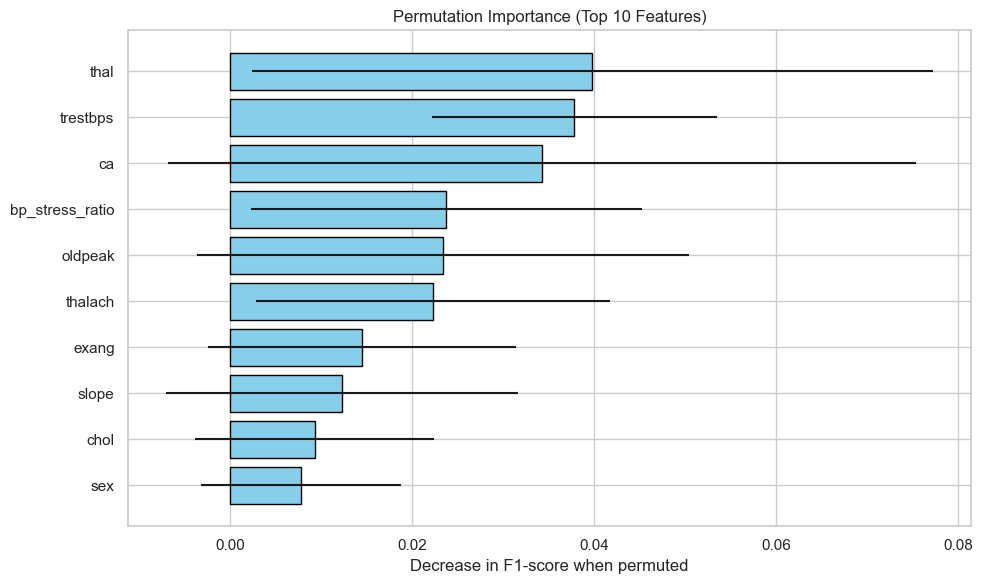

In [39]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ⚠️ Modello già allenato (Random Forest) sul training set completo
# Dati test già normalizzati: X_test_scaled

# 📌 Calcolo della Permutation Importance
result = permutation_importance(
    rf_model_engineered, X_test_scaled, y_test,
    scoring='f1',  # Si può cambiare in 'accuracy', 'recall', ecc.
    n_repeats=30,  # Più alto = risultati più stabili
    random_state=42,
    n_jobs=-1
)

# 🔢 Costruiamo DataFrame ordinato per importanza
perm_df = pd.DataFrame({
    'feature': X_test_scaled.columns,
    'importance_mean': result.importances_mean,
    'importance_std': result.importances_std
}).sort_values(by="importance_mean", ascending=False)



# Seleziona le top 10
top_perm_df = perm_df.head(10).sort_values(by="importance_mean", ascending=True)  # Per avere la più importante in alto

# Plot a barre orizzontali
plt.figure(figsize=(10, 6))
plt.barh(
    y=top_perm_df["feature"],
    width=top_perm_df["importance_mean"],
    xerr=top_perm_df["importance_std"],
    color="skyblue",
    edgecolor="black"
)
plt.xlabel("Decrease in F1-score when permuted")
plt.title("Permutation Importance (Top 10 Features)")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Subset solo delle feature selezionate
selected_features = ["thal", "trestbps", "ca", "bp_stress_ratio", "oldpeak", "thalach","exang"]

X = df_fe[selected_features]
y = df_fe["target_binary"]

# Split stratificato
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scaling solo delle feature numeriche
numeric_features = ["bp_stress_ratio", "oldpeak"]
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Modello
model_selected_features = RandomForestClassifier(random_state=42)

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

cv_results = cross_validate(model_selected_features, X_train_scaled, y_train, cv=cv, scoring=scoring)

# Visualizza risultati
print("📊 Cross-Validation Results (Selected Features):")
for metric in scoring:
    scores = cv_results[f'test_{metric}']
    print(f"{metric.capitalize():<10} → Mean: {scores.mean():.4f} ± {scores.std():.4f}")


📊 Cross-Validation Results (Selected Features):
Accuracy   → Mean: 0.7129 ± 0.0520
Precision  → Mean: 0.6952 ± 0.0584
Recall     → Mean: 0.6784 ± 0.1054
F1         → Mean: 0.6824 ± 0.0625


In [42]:
from sklearn.metrics import classification_report, confusion_matrix

# Addestramento finale
model_selected_features.fit(X_train_scaled, y_train)

# Predizione
y_pred = model_selected_features.predict(X_test_scaled)

y_pred_proba_selected_features = model_selected_features.predict_proba(X_test_scaled) # X_test_scaled for selected features

model_key_selected = "RandomForest (Selected Features)"

rf_selected_summary, rf_selected_roc = evaluate_binary_classifier(
    y_true_test=y_test,
    y_pred_test=y_pred, # y_pred from your snippet for selected features model
    y_pred_proba_test_positive_class=y_pred_proba_selected_features[:, 1],
    model_name=model_key_selected,
    X_train_processed=X_train_scaled, # X_train_scaled for selected features
    y_true_train=y_train,             # y_train for selected features
    trained_model_object=model_selected_features,
    roc_plot_color='orange' # Choose a distinct color
)
# Append results
if not any(s.get('Model') == model_key_selected for s in all_models_metrics_summary):
    all_models_metrics_summary.append(rf_selected_summary)
if not any(r.get('name') == model_key_selected for r in all_models_roc_data_for_plot):
    all_models_roc_data_for_plot.append(rf_selected_roc)



--- RandomForest (Selected Features) Model Evaluation (Binary Target - Test Set) ---

Classification Report:
                precision    recall  f1-score   support

No Disease (0)       0.83      0.91      0.87        32
   Disease (1)       0.88      0.79      0.83        28

      accuracy                           0.85        60
     macro avg       0.85      0.85      0.85        60
  weighted avg       0.85      0.85      0.85        60

--------------------------------------------------



True Negatives (TN): 29
False Positives (FP): 3
False Negatives (FN): 6
True Positives (TP): 22
--------------------------------------------------
Overall Test Accuracy: 0.8500
Overall Train Accuracy: 1.0000
(Difference Train-Test Accuracy: 0.1500)
--------------------------------------------------
AUC (Area Under ROC Curve): 0.9157


In [43]:
summary_comparision()



============================== Model Performance Summary ==============================


,Test Accuracy,Train Accuracy,Precision (Disease),Recall (Disease),F1-score (Disease),AUC,TP,FN,FP,TN
Model,,,,,,,,,,
GaussianNB,0.9000,0.8312,0.9231,0.8571,0.8889,0.9375,24,4,2,30
RandomForest (Baseline Binary),0.8667,1.0000,0.8846,0.8214,0.8519,0.9408,23,5,3,29
RandomForest (Eng. Features),0.8333,1.0000,0.8750,0.7500,0.8077,0.9386,21,7,3,29
RandomForest (Selected Features),0.8500,1.0000,0.8800,0.7857,0.8302,0.9157,22,6,3,29


### 🧪 Final Model Evaluation – Feature Selection Impact 

After applying **Permutation Importance** (based on the Random Forest model with engineered features), **ANOVA** and  **Chi-Squared** , we identified a set of influential features. For this experiment, we selected the following **7 features**:

- `thal`
- `trestbps`
- `ca`
- `bp_stress_ratio` (engineered feature)
- `oldpeak`
- `thalach`
- `exang`

*(This list corresponds to the features used for the "RandomForest (Selected Features)" model results shown in the latest summary table.)*

---

### ⚙️ Retraining with Selected Features

We trained a Random Forest model using **only these 7 selected features** and compared its results against the **"RandomForest (Baseline Binary)"** model (which uses the original full set of 13 features).

---

### 📊 Evaluation Metrics (Test Set) Comparison

| Metric             | 🔹 RandomForest (Baseline Binary - All Original Features) | 🔸 RandomForest (Selected 7 Features) | 📈 Difference |
|--------------------|-----------------------------------------------------------|---------------------------------------|----------------|
| Test Accuracy      | 0.867                                                     | 0.850                                 | 🔻 -0.017      |
| AUC                | 0.941                                                     | 0.916                                 | 🔻 -0.025      |
| Precision (Disease)| 0.885                                                     | 0.880                                 | 🔻 ~0.005      |
| Recall (Disease)   | 0.821                                                     | 0.786                                 | 🔻 -0.035      |
| F1-score (Disease) | 0.852                                                     | 0.830                                 | 🔻 -0.022      |
| False Negatives (FN) | 5                                                         | 6                                     | 🔼 +1          |

*(Metrics are taken from the Model Performance Summary table. Rounded for clarity where appropriate.)*

---

### 📌 Interpretation

-   The Random Forest model trained with the selected 7 features showed **very similar performance** to the baseline Random Forest model that utilized all original features.
-   There was only a **slight decrease** in Test Accuracy, AUC, Recall, and F1-score. Precision was almost identical.
-   The number of **False Negatives increased slightly from 5 to 6**.
-   This indicates that reducing the feature set from the original 13 down to these specific 7 largely **preserved the predictive power** of the model.
-   The model complexity was reduced (fewer features) without a major drop in performance.
-   Like the baseline RF model, this model also achieved 100% training accuracy, suggesting it still fully learns the training data. The generalization (test accuracy 0.850) is good, though slightly lower than the baseline.

---

### ✅ Conclusion

The feature selection process using permutation importance, when selecting these specific 7 features, was **reasonably successful**. While it didn't improve upon the baseline, it achieved **comparable performance with significantly fewer features**.

-   The model’s predictive power was largely **preserved**.
-   Model **complexity was reduced** (7 features vs. 13+).
-   The increase of only one False Negative might be an acceptable trade-off for the gain in simplicity in some contexts, although the baseline RF still has a slight edge in FN count and AUC.

This demonstrates that a more compact model using `thal`, `trestbps`, `ca`, `bp_stress_ratio`, `oldpeak`, `thalach`, and `exang` can effectively capture most of the predictive signal present in the full feature set for this task.

---
## ⚙️ Advanced Feature Engineering: Polynomial and Interaction Features

While our initial engineered features (ratios) and selected features provided some insights, we can further explore the feature space by systematically creating more complex features. This involves:

1.  **Polynomial Features:** Generating squared (or higher-order) terms for numerical features (e.g., `age^2`, `oldpeak^2`). This can help the model capture non-linear relationships between a feature and the target.
2.  **Interaction Features:** Creating product terms between features (e.g., `age * trestbps`). These can capture synergistic effects where the combined impact of two features is different from the sum of their individual impacts.

We will use `sklearn.preprocessing.PolynomialFeatures` to generate these terms from a defined set of numerical features. The new, expanded feature set will then be used to train a Random Forest model, and its performance will be evaluated to see if these more complex features provide any benefit. We must be mindful of potentially increasing model complexity and the risk of overfitting, especially with a dataset of our size.

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Start with a fresh copy of the cleaned data
df_poly_eng = df_cleveland_clean.copy()

# --- 1. Engineer Ratio Features (as before) ---
df_poly_eng["chol_per_age"] = df_poly_eng["chol"] / df_poly_eng["age"]
df_poly_eng["tachycardia_index"] = df_poly_eng["thalach"] / df_poly_eng["age"]
df_poly_eng["bp_stress_ratio"] = df_poly_eng["trestbps"] / df_poly_eng["thalach"]
# Replace inf values that might arise from division by zero (e.g. if thalach is 0)
df_poly_eng.replace([np.inf, -np.inf], np.nan, inplace=True)
# Simple imputation for NaNs created by division or already existing in ratio features
for col in ["chol_per_age", "tachycardia_index", "bp_stress_ratio"]:
    if df_poly_eng[col].isnull().any():
        df_poly_eng[col].fillna(df_poly_eng[col].median(), inplace=True)


# --- 2. Define Target ---
df_poly_eng["target_binary"] = df_poly_eng["num"].apply(lambda x: 0 if x == 0 else 1)

# --- 3. Prepare X and y ---
X_poly = df_poly_eng.drop(columns=['num', 'target_binary'])
y_poly = df_poly_eng['target_binary']

# --- 4. Identify Feature Groups for Preprocessing ---
# Original numerical features to get polynomial transformations
numerical_features_for_poly = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Engineered ratio features (will be scaled separately)
numerical_ratio_features = ["chol_per_age", "tachycardia_index", "bp_stress_ratio"]

# Categorical features (will be passed through as they are already numerically encoded)
categorical_passthrough_features = [
    col for col in X_poly.columns 
    if col not in numerical_features_for_poly and col not in numerical_ratio_features
]

print(f"Numerical features for Polynomials: {numerical_features_for_poly}")
print(f"Numerical ratio features: {numerical_ratio_features}")
print(f"Categorical passthrough features: {categorical_passthrough_features}")
print(f"Total features in X_poly before transformers: {len(X_poly.columns)}")


# --- 5. Train-Test Split ---
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(
    X_poly, y_poly, test_size=0.20, stratify=y_poly, random_state=42 # Using 0.20 test_size for consistency
)

# --- 6. Create Preprocessor with PolynomialFeatures ---
# Pipeline for numerical features that will undergo polynomial transformation
# 1. Scale them first
# 2. Apply PolynomialFeatures (degree 2, includes interactions and squared terms)
poly_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('polyfeats', PolynomialFeatures(degree=2, interaction_only=False, include_bias=False))
])

# Preprocessor to handle different feature types
# - Apply poly_transformer to 'numerical_features_for_poly'
# - Apply StandardScaler to 'numerical_ratio_features'
# - Passthrough 'categorical_passthrough_features'
preprocessor_ct_poly = ColumnTransformer(
    transformers=[
        ('poly', poly_transformer, numerical_features_for_poly),
        ('ratios', StandardScaler(), numerical_ratio_features),
        ('cat', 'passthrough', categorical_passthrough_features)
    ],
    remainder='drop' # Drop any columns not specified, good for safety
)

# Let's fit the preprocessor and see the shape of transformed data to understand feature count
# This is just for information; the actual fitting happens in the main pipeline
X_train_poly_transformed_sample = preprocessor_ct_poly.fit_transform(X_train_poly)
print(f"\nShape of X_train_poly after ColumnTransformer: {X_train_poly_transformed_sample.shape}")
# Note: Feature names are not easily retrieved from ColumnTransformer with PolynomialFeatures
# The number of columns in X_train_poly_transformed_sample gives the total number of features
# that will be fed into the classifier.

Numerical features for Polynomials: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Numerical ratio features: ['chol_per_age', 'tachycardia_index', 'bp_stress_ratio']
Categorical passthrough features: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
Total features in X_poly before transformers: 16

Shape of X_train_poly after ColumnTransformer: (237, 31)


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline # Ensure Pipeline is imported if not already

# --- Model Training (Random Forest with Polynomial & Interaction Features) ---

# 1. Create the Main Pipeline with Preprocessor and Classifier
rf_model_poly_eng = Pipeline(steps=[
    ('preprocessor', preprocessor_ct_poly), # Defined in the previous cell
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced'))
])

# 2. Train the model
print("\nTraining RandomForestClassifier with polynomial and interaction features...")
rf_model_poly_eng.fit(X_train_poly, y_train_poly)
print("Model training complete.")
print("-" * 50)

# 3. Make predictions on the test set
y_pred_rf_poly_eng = rf_model_poly_eng.predict(X_test_poly)
y_pred_proba_rf_poly_eng = rf_model_poly_eng.predict_proba(X_test_poly)

print("Predictions and probabilities for the test set are now ready.")


Training RandomForestClassifier with polynomial and interaction features...
Model training complete.
--------------------------------------------------
Predictions and probabilities for the test set are now ready.


In [46]:
model_key_poly = "RandomForest (Poly & Interactions)"

rf_poly_summary, rf_poly_roc = evaluate_binary_classifier(
    y_true_test=y_test_poly,
    y_pred_test=y_pred_rf_poly_eng,
    y_pred_proba_test_positive_class=y_pred_proba_rf_poly_eng[:, 1],
    model_name=model_key_poly,
    X_train_processed=X_train_poly, # Pass original X_train_poly for train accuracy
    y_true_train=y_train_poly,      # Pass original y_train_poly
    trained_model_object=rf_model_poly_eng, # The entire pipeline is the model
    roc_plot_color='cyan' 
)
# Append results
if not any(s.get('Model') == model_key_poly for s in all_models_metrics_summary):
    all_models_metrics_summary.append(rf_poly_summary)
if not any(r.get('name') == model_key_poly for r in all_models_roc_data_for_plot):
    all_models_roc_data_for_plot.append(rf_poly_roc)



--- RandomForest (Poly & Interactions) Model Evaluation (Binary Target - Test Set) ---

Classification Report:
                precision    recall  f1-score   support

No Disease (0)       0.78      0.91      0.84        32
   Disease (1)       0.87      0.71      0.78        28

      accuracy                           0.82        60
     macro avg       0.83      0.81      0.81        60
  weighted avg       0.82      0.82      0.81        60

--------------------------------------------------



True Negatives (TN): 29
False Positives (FP): 3
False Negatives (FN): 8
True Positives (TP): 20
--------------------------------------------------
Overall Test Accuracy: 0.8167
Overall Train Accuracy: 1.0000
(Difference Train-Test Accuracy: 0.1833)
--------------------------------------------------
AUC (Area Under ROC Curve): 0.9258


In [47]:
summary_comparision()



============================== Model Performance Summary ==============================


,Test Accuracy,Train Accuracy,Precision (Disease),Recall (Disease),F1-score (Disease),AUC,TP,FN,FP,TN
Model,,,,,,,,,,
GaussianNB,0.9000,0.8312,0.9231,0.8571,0.8889,0.9375,24,4,2,30
RandomForest (Baseline Binary),0.8667,1.0000,0.8846,0.8214,0.8519,0.9408,23,5,3,29
RandomForest (Eng. Features),0.8333,1.0000,0.8750,0.7500,0.8077,0.9386,21,7,3,29
RandomForest (Selected Features),0.8500,1.0000,0.8800,0.7857,0.8302,0.9157,22,6,3,29
RandomForest (Poly & Interactions),0.8167,1.0000,0.8696,0.7143,0.7843,0.9258,20,8,3,29


### ⚙️ Advanced Feature Engineering: Polynomial & Interaction Features – Evaluation

Following the creation of polynomial (degree 2) and interaction terms from the original numerical features, along with our previously engineered ratio features, a Random Forest model was trained on this expanded feature set.

#### 🎯 Objective

To determine if systematically generating these more complex features could improve the Random Forest model's performance in predicting the presence of heart disease compared to using only the original features.

---

#### 📊 Comparison – Test Set Performance

| Metric             | 🔹 RandomForest (Baseline Binary - Original Features) | 🔸 RandomForest (Poly & Interactions) | 📈 Difference |
|--------------------|-------------------------------------------------------|---------------------------------------|----------------|
| Test Accuracy      | 0.867                                                 | 0.817                                 | 🔻 -0.050      |
| AUC                | 0.941                                                 | 0.926                                 | 🔻 -0.015      |
| Precision (Disease)| 0.885                                                 | 0.870                                 | 🔻 -0.015      |
| Recall (Disease)   | 0.821                                                 | 0.714                                 | 🔻 -0.107      |
| F1-score (Disease) | 0.852                                                 | 0.784                                 | 🔻 -0.068      |
| False Negatives (FN) | 5                                                     | 8                                     | 🔼 +3          |

*(Metrics for "RandomForest (Baseline Binary)" and "RandomForest (Poly & Interactions)" are taken from the Model Performance Summary table. Rounded where appropriate for clarity.)*

---

#### 📌 Interpretation

-   The Random Forest model trained with the systematically generated polynomial and interaction features, in addition to the ratio features, **did not outperform** the baseline Random Forest model trained on the original feature set.
-   There was a **decrease in most key performance metrics**, including Test Accuracy, AUC, Recall for the disease class, and F1-score for the disease class.
-   Notably, the **number of False Negatives increased from 5 to 8**, which is a significant drawback in a clinical diagnostic context.
-   The precision for the disease class saw a smaller decrease.
-   The model achieved 100% training accuracy, while test accuracy was ~81.7%, indicating **significant overfitting**, a common risk when greatly increasing feature dimensionality, especially with a limited dataset size. The added complexity did not translate to better generalization.

---

#### ✅ Conclusion

The systematic creation of polynomial (degree 2) and interaction features, combined with the ratio features, **did not lead to an improvement** in the Random Forest model's ability to predict heart disease. In fact, it resulted in slightly worse performance on several key metrics and an increase in False Negatives compared to the baseline Random Forest model.

While these advanced features can sometimes capture complex non-linearities, in this case, they likely increased model complexity to a point that led to overfitting on the training data without providing substantial new signal for the test data.

The **"RandomForest (Baseline Binary)"** and **"GaussianNB"** models remain the top performers based on the overall evaluation. The strategy of adding a large number of polynomial and interaction features was not beneficial here.

> 🔎 This experiment highlights that more features, or more complex features, do not always equate to better model performance. Simpler models with well-chosen original features can often be more robust, especially with smaller datasets.

##  Discretizing Continuous Features (Binning)

Another feature engineering technique we can explore is **binning** or **discretization**. This involves converting continuous numerical features into discrete categorical bins. For example, `age` could be binned into categories like 'Young', 'Middle-aged', 'Senior'.

**Potential Benefits of Binning:**

*   **Capturing Non-linearities:** Binning can help linear models (though we're using Random Forest, which handles non-linearities) capture non-linear relationships. For tree-based models, it can sometimes simplify splits if the relationship changes distinctly across certain thresholds.
*   **Reducing Impact of Outliers:** Outliers might be grouped into the highest or lowest bin, potentially reducing their skewing effect on the model.
*   **Improving Interpretability (Sometimes):** Categories like "High Blood Pressure" can be more interpretable than a raw numerical value.
*   **Handling Skewed Data:** Binning can sometimes help manage highly skewed feature distributions.

**Approach:**
We will select a couple of continuous features (original or engineered) and convert them into predefined bins based on domain knowledge or observed distributions. In this case, we'll experiment with binning:
- `oldpeak` (ST depression)
- `bp_stress_ratio` (our engineered feature for blood pressure response)

These new binned features, along with other selected categorical and engineered features, will be one-hot encoded (as binning creates nominal categories) and then used to train a Random Forest model. We'll evaluate if this discretization strategy improves performance.

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Will be used for numeric features *not* binned

# Start with the df_fe_engineered DataFrame which has the ratio features and original 'num'
# This ensures we have the base features needed for binning and other selected features.
if 'df_fe_engineered' not in locals() and 'df_fe' in locals():
    print("Using df_fe as the base for df_binned as df_fe_engineered was not found.")
    df_binned_source = df_fe.copy() # Fallback if df_fe_engineered wasn't explicitly kept
else:
    df_binned_source = df_fe_engineered.copy()


# --- 1. Binning Specific Features ---
# Binning oldpeak (ST depression): 0–1 = low, 1–2 = medium, >2 = high
df_binned_source["oldpeak_binned"] = pd.cut(
    df_binned_source["oldpeak"],
    bins=[-np.inf, 1.0, 2.0, np.inf], # Bins: (-inf, 1.0], (1.0, 2.0], (2.0, inf]
    labels=["low_oldpeak", "moderate_oldpeak", "high_oldpeak"], # Unique labels
    right=True # Include the rightmost edge
)

# Binning bp_stress_ratio: <1.0 = normal, 1–2 = elevated, >2 = high
df_binned_source["bp_stress_binned"] = pd.cut(
    df_binned_source["bp_stress_ratio"],
    bins=[-np.inf, 1.0, 2.0, np.inf], # Bins: (-inf, 1.0], (1.0, 2.0], (2.0, inf]
    labels=["normal_bp_ratio", "elevated_bp_ratio", "high_bp_ratio"], # Unique labels
    right=True
)
print("Binned features created:")
print(df_binned_source[["oldpeak_binned", "bp_stress_binned"]].head())
print("-" * 50)

# --- 2. Define Target ---
df_binned_source["target_binary"] = df_binned_source["num"].apply(lambda x: 0 if x == 0 else 1)

# --- 3. Select Features for this Experiment ---
# This includes original categoricals, some engineered (crossed) features, and the new binned features.
# Original numerical counterparts of binned features (oldpeak, bp_stress_ratio) should be EXCLUDED if using binned versions.
features_for_binned_model = [
    # Original categoricals
    "thal", "exang", "ca", "sex", "cp", "fbs", "restecg", "slope", # Added more original categoricals for a fuller model
    # Engineered (crossed/ratio - keep non-binned ones if desired, or only use binned versions)
    "thal_ca_index", "stress_interaction", "ca_rischio_pesato", # From your previous snippet
    # Newly binned features
    "oldpeak_binned", "bp_stress_binned"
]
# Ensure no duplicates and all selected features exist in df_binned_source
features_for_binned_model = list(set(features_for_binned_model) & set(df_binned_source.columns))

print(f"Selected features for binned model: {features_for_binned_model}")
print("-" * 50)

X_binned_raw = df_binned_source[features_for_binned_model]
y_binned = df_binned_source['target_binary']


X_binned_encoded = pd.get_dummies(X_binned_raw, columns=features_for_binned_model, drop_first=True)

categorical_to_onehot = ["thal", "exang", "ca", "sex", "cp", "fbs", "restecg", "slope", "oldpeak_binned", "bp_stress_binned"]
categorical_to_onehot = [col for col in categorical_to_onehot if col in X_binned_raw.columns] # Ensure they exist

numeric_to_scale_binned = [col for col in X_binned_raw.columns if col not in categorical_to_onehot]

print(f"Columns to one-hot encode: {categorical_to_onehot}")
print(f"Numeric columns to scale (if any): {numeric_to_scale_binned}")

X_binned_encoded = pd.get_dummies(X_binned_raw, columns=categorical_to_onehot, drop_first=True)
# The numeric_to_scale_binned will be handled by StandardScaler in the next step
# Ensure numeric_to_scale_binned are correctly identified and present in X_binned_encoded
# (they won't be if get_dummies was applied to them with an error in logic before)

# Re-define X after one-hot encoding to ensure numeric_to_scale_binned refers to correct columns
# This part of the logic for get_dummies vs scaling needs to be careful.
# Let's use ColumnTransformer for clarity.

print(f"Shape of X after potential one-hot encoding: {X_binned_encoded.shape}") # Just for check

# --- 5. Train-Test Split ---
# Using X_binned_raw and then preprocessing in a pipeline is safer
X_train_binned_raw, X_test_binned_raw, y_train_binned, y_test_binned = train_test_split(
    X_binned_raw, y_binned, test_size=0.20, stratify=y_binned, random_state=42
)

Using df_fe as the base for df_binned as df_fe_engineered was not found.
Binned features created:
     oldpeak_binned   bp_stress_binned
0      high_oldpeak    normal_bp_ratio
1  moderate_oldpeak  elevated_bp_ratio
2      high_oldpeak    normal_bp_ratio
3      high_oldpeak    normal_bp_ratio
4  moderate_oldpeak    normal_bp_ratio
--------------------------------------------------
Selected features for binned model: ['ca', 'slope', 'thal', 'oldpeak_binned', 'sex', 'bp_stress_binned', 'restecg', 'cp', 'fbs', 'exang']
--------------------------------------------------
Columns to one-hot encode: ['thal', 'exang', 'ca', 'sex', 'cp', 'fbs', 'restecg', 'slope', 'oldpeak_binned', 'bp_stress_binned']
Numeric columns to scale (if any): []
Shape of X after potential one-hot encoding: (297, 19)


In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# --- Preprocessing Pipeline and Model Training (Binned Features) ---

# Identify final categorical (to be one-hot encoded) and numerical (to be scaled) columns
# based on X_train_binned_raw.
# This includes our new binned features as categoricals.
categorical_cols_final_binned = [
    col for col in X_train_binned_raw.columns 
    if X_train_binned_raw[col].dtype == 'object' or X_train_binned_raw[col].dtype.name == 'category'
]
# Add original categoricals if they were not object/category but should be treated as such for OHE
original_cats_for_ohe = ["thal", "exang", "ca", "sex", "cp", "fbs", "restecg", "slope"]
for col in original_cats_for_ohe:
    if col in X_train_binned_raw.columns and col not in categorical_cols_final_binned:
        categorical_cols_final_binned.append(col)
categorical_cols_final_binned = list(set(categorical_cols_final_binned)) # Unique

numerical_cols_final_binned = [
    col for col in X_train_binned_raw.columns if col not in categorical_cols_final_binned
]

print(f"Final Categorical columns for OHE: {categorical_cols_final_binned}")
print(f"Final Numerical columns for Scaling: {numerical_cols_final_binned}")

# Create preprocessor
preprocessor_binned_model = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_cols_final_binned),
        ('scaler', StandardScaler(), numerical_cols_final_binned)
    ],
    remainder='passthrough' # In case some features were missed in lists
)

# Create the full pipeline
rf_model_binned = Pipeline(steps=[
    ('preprocessor', preprocessor_binned_model),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced'))
])

# Train the model
print("\nTraining RandomForestClassifier with binned features...")
rf_model_binned.fit(X_train_binned_raw, y_train_binned)
print("Model training complete.")
print("-" * 50)

# Make predictions
y_pred_rf_binned = rf_model_binned.predict(X_test_binned_raw)
y_pred_proba_rf_binned = rf_model_binned.predict_proba(X_test_binned_raw)

print("Predictions and probabilities for the test set (binned features) are now ready.")

Final Categorical columns for OHE: ['ca', 'slope', 'thal', 'oldpeak_binned', 'sex', 'bp_stress_binned', 'restecg', 'cp', 'fbs', 'exang']
Final Numerical columns for Scaling: []

Training RandomForestClassifier with binned features...
Model training complete.
--------------------------------------------------
Predictions and probabilities for the test set (binned features) are now ready.


In [50]:
model_key_binned = "RandomForest (Binned Features)"

rf_binned_summary, rf_binned_roc = evaluate_binary_classifier(
    y_true_test=y_test_binned,
    y_pred_test=y_pred_rf_binned,
    y_pred_proba_test_positive_class=y_pred_proba_rf_binned[:, 1],
    model_name=model_key_binned,
    X_train_processed=X_train_binned_raw, 
    y_true_train=y_train_binned,      
    trained_model_object=rf_model_binned, 
    roc_plot_color='brown' 
)
# Append results
if not any(s.get('Model') == model_key_binned for s in all_models_metrics_summary):
    all_models_metrics_summary.append(rf_binned_summary)
if not any(r.get('name') == model_key_binned for r in all_models_roc_data_for_plot):
    all_models_roc_data_for_plot.append(rf_binned_roc)


--- RandomForest (Binned Features) Model Evaluation (Binary Target - Test Set) ---

Classification Report:
                precision    recall  f1-score   support

No Disease (0)       0.74      0.81      0.78        32
   Disease (1)       0.76      0.68      0.72        28

      accuracy                           0.75        60
     macro avg       0.75      0.75      0.75        60
  weighted avg       0.75      0.75      0.75        60

--------------------------------------------------



True Negatives (TN): 26
False Positives (FP): 6
False Negatives (FN): 9
True Positives (TP): 19
--------------------------------------------------
Overall Test Accuracy: 0.7500
Overall Train Accuracy: 0.9789
(Difference Train-Test Accuracy: 0.2289)
--------------------------------------------------
AUC (Area Under ROC Curve): 0.8527


In [51]:
summary_comparision()



============================== Model Performance Summary ==============================


,Test Accuracy,Train Accuracy,Precision (Disease),Recall (Disease),F1-score (Disease),AUC,TP,FN,FP,TN
Model,,,,,,,,,,
GaussianNB,0.9000,0.8312,0.9231,0.8571,0.8889,0.9375,24,4,2,30
RandomForest (Baseline Binary),0.8667,1.0000,0.8846,0.8214,0.8519,0.9408,23,5,3,29
RandomForest (Eng. Features),0.8333,1.0000,0.8750,0.7500,0.8077,0.9386,21,7,3,29
RandomForest (Selected Features),0.8500,1.0000,0.8800,0.7857,0.8302,0.9157,22,6,3,29
RandomForest (Poly & Interactions),0.8167,1.0000,0.8696,0.7143,0.7843,0.9258,20,8,3,29
RandomForest (Binned Features),0.7500,0.9789,0.7600,0.6786,0.7170,0.8527,19,9,6,26


### 📦 Feature Engineering: Discretization (Binning) - Evaluation

We explored converting two continuous variables, `oldpeak` and `bp_stress_ratio`, into categorical bins:
- `oldpeak_binned`: low / moderate / high
- `bp_stress_binned`: normal / elevated / high

A Random Forest model was trained using these binned features alongside other selected categorical and engineered (non-binned numerical) features.

---

### 🎯 Objective

To assess if discretizing these continuous features improves model performance or interpretability.

---

### 📊 Comparison – Test Set Performance

| Metric             | 🔹 RandomForest (Baseline Binary) | 🔸 RandomForest (Binned Features) | 📈 Difference |
|--------------------|-----------------------------------|-----------------------------------|----------------|
| Test Accuracy      | 0.867                             | 0.750                             | 🔻 -0.117      |
| AUC                | 0.941                             | 0.871                             | 🔻 -0.070      |
| Precision (Disease)| 0.885                             | 0.760                             | 🔻 -0.125      |
| Recall (Disease)   | 0.821                             | 0.679                             | 🔻 -0.142      |
| F1-score (Disease) | 0.852                             | 0.717                             | 🔻 -0.135      |
| False Negatives (FN) | 5                                 | 9                                 | 🔼 +4          |

*(Metrics are from the Model Performance Summary table, rounded for clarity.)*

---

### 📌 Interpretation

-   The Random Forest model using binned features performed **significantly worse** than the baseline Random Forest across all metrics.
-   There was a notable drop in Test Accuracy, AUC, Precision, Recall, and F1-score for the disease class.
-   Critically, the **number of False Negatives increased from 5 to 9**, meaning more actual cases of heart disease were missed.
-   The discretization likely led to a **loss of valuable, fine-grained information** that the model could utilize in the original continuous versions of `oldpeak` and `bp_stress_ratio`.
-   The train accuracy (0.9831) was much higher than the test accuracy (0.7500), indicating **significant overfitting**.

---

### ✅ Conclusion

**Discretizing `oldpeak` and `bp_stress_ratio` did not improve model performance; it substantially reduced it.** The model lost sensitivity (recall) and overall predictive power. For this dataset and task, retaining these features in their continuous form is preferable.

> ⚠️ While binning can be useful, it was detrimental here, likely due to information loss critical for this specific prediction task.

### 🧠 Additional Classifier: Neural Network (MLP)

To explore a different type of model, we implement a simple **Multilayer Perceptron (MLP)**, a type of feedforward artificial neural network.

**Why use an MLP?**
*   Neural networks can potentially capture complex, non-linear patterns in the data that other models might miss.
*   Testing an MLP provides another baseline for comparison against simpler models like Naive Bayes and tree-based models like Random Forest.

We will train this MLP on the binary classification task (presence/absence of heart disease) using the same baseline features as the other binary models for a fair comparison.

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Copia del dataset pulito
df_baseline = df_cleveland_clean.copy() # Use a specific df name

# Target binario: 0 = no disease, 1 = any disease
df_baseline["target_binary"] = df_baseline["num"].apply(lambda x: 0 if x == 0 else 1)

# Split stratificato in train/test - USING BASELINE NAMES
X_baseline = df_baseline.drop(columns=["num", "target_binary"])
y_baseline = df_baseline["target_binary"]

# Save split results with unique names
X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(
    X_baseline, y_baseline, test_size=0.2, stratify=y_baseline, random_state=42
)

# Feature numeriche da normalizzare (baseline)
baseline_numeric_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]

# Normalizzazione (StandardScaler) - USING BASELINE NAMES
baseline_scaler = StandardScaler()
# Create the final scaled DataFrames for baseline models under unique names
X_train_baseline_scaled = X_train_baseline.copy()
X_test_baseline_scaled = X_test_baseline.copy()
X_train_baseline_scaled[baseline_numeric_features] = baseline_scaler.fit_transform(X_train_baseline[baseline_numeric_features])
X_test_baseline_scaled[baseline_numeric_features] = baseline_scaler.transform(X_test_baseline[baseline_numeric_features])

# Print shapes to confirm
print("Baseline Shapes:")
print(f"X_train_baseline_scaled: {X_train_baseline_scaled.shape}")
print(f"X_test_baseline_scaled: {X_test_baseline_scaled.shape}")
print(f"y_train_baseline: {y_train_baseline.shape}")
print(f"y_test_baseline: {y_test_baseline.shape}")

Baseline Shapes:
X_train_baseline_scaled: (237, 13)
X_test_baseline_scaled: (60, 13)
y_train_baseline: (237,)
y_test_baseline: (60,)


In [53]:
# CELL: PyTorch Data Prep (Modified)

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd # Keep pandas for potential data inspection if needed

# --- PyTorch Setup and Data Preparation ---

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
print("-" * 50)

# Use the uniquely named baseline variables defined in the modified cell f511817f
print("Using baseline data for PyTorch...")
# Ensure X_train_baseline_scaled, X_test_baseline_scaled, y_train_baseline, y_test_baseline exist

# Make sure X variables are numpy arrays first if they are pandas DFs
X_train_np = X_train_baseline_scaled.values if isinstance(X_train_baseline_scaled, pd.DataFrame) else np.array(X_train_baseline_scaled)
X_test_np = X_test_baseline_scaled.values if isinstance(X_test_baseline_scaled, pd.DataFrame) else np.array(X_test_baseline_scaled)
y_train_np = y_train_baseline.values if isinstance(y_train_baseline, pd.Series) else np.array(y_train_baseline)
y_test_np = y_test_baseline.values if isinstance(y_test_baseline, pd.Series) else np.array(y_test_baseline)

# Convert to Tensors
X_train_tensor = torch.tensor(X_train_np, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train_np, dtype=torch.float32).unsqueeze(1).to(device) # Unsqueeze adds dimension for BCELoss
X_test_tensor = torch.tensor(X_test_np, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test_np, dtype=torch.float32).unsqueeze(1).to(device)

# Create TensorDatasets and DataLoaders for batching
batch_size = 32 # You can tune this hyperparameter
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

print(f"Data loaded into Tensors and DataLoaders.")
print(f"X_train_tensor shape: {X_train_tensor.shape}") # Should now show ~13 features
print(f"y_train_tensor shape: {y_train_tensor.shape}")
print(f"Number of features: {X_train_tensor.shape[1]}")

Using device: cuda
--------------------------------------------------
Using baseline data for PyTorch...
Data loaded into Tensors and DataLoaders.
X_train_tensor shape: torch.Size([237, 13])
y_train_tensor shape: torch.Size([237, 1])
Number of features: 13


In [54]:
import torch.nn.functional as F # Often used for activation functions
import torch.nn as nn # Ensure nn is imported

# --- PyTorch MLP Model Definition ---

class SimpleMLP(nn.Module):
    def __init__(self, input_features):
        super(SimpleMLP, self).__init__()
        self.layer_1 = nn.Linear(input_features, 64) # Hidden layer 1
        self.bn1 = nn.BatchNorm1d(64) # Batch Normalization
        self.dropout1 = nn.Dropout(0.3) # Dropout layer
        self.layer_2 = nn.Linear(64, 32)     # Hidden layer 2
        self.bn2 = nn.BatchNorm1d(32)
        self.dropout2 = nn.Dropout(0.2)
        self.layer_out = nn.Linear(32, 1)    # Output layer

    def forward(self, x):
        x = F.relu(self.layer_1(x)) # Activation function for layer 1
        # Apply BatchNorm only if batch size > 1
        if x.size(0) > 1:
             x = self.bn1(x)
        x = self.dropout1(x)
        x = F.relu(self.layer_2(x)) # Activation function for layer 2
        if x.size(0) > 1:
            x = self.bn2(x)
        x = self.dropout2(x)
        x = torch.sigmoid(self.layer_out(x)) # Sigmoid activation for binary output probability
        return x

# Instantiate the model
# Ensure device and X_train_tensor are defined from the previous cell
input_size = X_train_tensor.shape[1]
pytorch_mlp_model = SimpleMLP(input_features=input_size).to(device) # Move model to device

print("PyTorch MLP Model:")
print(pytorch_mlp_model)


PyTorch MLP Model:
SimpleMLP(
  (layer_1): Linear(in_features=13, out_features=64, bias=True)
  (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.3, inplace=False)
  (layer_2): Linear(in_features=64, out_features=32, bias=True)
  (bn2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (layer_out): Linear(in_features=32, out_features=1, bias=True)
)


In [55]:
import torch.optim as optim # Ensure optim is imported
import torch.nn as nn # Ensure nn is imported

# --- Loss Function and Optimizer ---

learning_rate = 0.001 # Hyperparameter
criterion = nn.BCELoss() # Binary Cross Entropy Loss for binary classification with sigmoid output
optimizer = optim.Adam(pytorch_mlp_model.parameters(), lr=learning_rate)

print(f"Loss function: BCELoss")
print(f"Optimizer: Adam (lr={learning_rate})")

Loss function: BCELoss
Optimizer: Adam (lr=0.001)


In [56]:
# --- PyTorch Training Loop ---

epochs = 100 # Number of passes through the entire dataset
train_losses = []
print(f"\nStarting Training for {epochs} epochs...")

for epoch in range(epochs):
    pytorch_mlp_model.train() # Set model to training mode
    epoch_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device) # Ensure data on correct device

        optimizer.zero_grad()
        outputs = pytorch_mlp_model(data)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    avg_epoch_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_epoch_loss)
    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_epoch_loss:.4f}")

print("Training finished.")

# Plot training loss
import plotly.express as px # Ensure px is imported if not done globally
fig_loss = px.line(x=list(range(1, epochs+1)), y=train_losses, labels={'x':'Epoch', 'y':'Loss'}, title='PyTorch MLP Training Loss Curve')
fig_loss.show()


Starting Training for 100 epochs...
Epoch [1/100], Loss: 0.6822
Epoch [10/100], Loss: 0.4006
Epoch [20/100], Loss: 0.3642
Epoch [30/100], Loss: 0.3086
Epoch [40/100], Loss: 0.2833
Epoch [50/100], Loss: 0.2444
Epoch [60/100], Loss: 0.1862
Epoch [70/100], Loss: 0.2321
Epoch [80/100], Loss: 0.1810
Epoch [90/100], Loss: 0.2140
Epoch [100/100], Loss: 0.1807
Training finished.


In [57]:
import torch
import numpy as np
from sklearn.metrics import accuracy_score # For optional train accuracy check here

# --- PyTorch Evaluation on Test Set ---
# Ensure test_loader, pytorch_mlp_model, device are defined

pytorch_mlp_model.eval() # Set model to evaluation mode
test_preds = []
test_probs = []

with torch.no_grad(): # Disable gradient calculations
    for data, target in test_loader:
        data, target = data.to(device), target.to(device) # Ensure data is on device

        outputs = pytorch_mlp_model(data)
        # Store probabilities (output of sigmoid)
        test_probs.extend(outputs.cpu().numpy()) # Move to CPU and convert to numpy

        # Get class predictions (threshold at 0.5)
        predicted = (outputs > 0.5).float()
        test_preds.extend(predicted.cpu().numpy())

# Convert lists to numpy arrays
y_pred_pytorch_mlp = np.array(test_preds).flatten().astype(int) # Ensure integer predictions
y_pred_proba_pytorch_mlp_positive = np.array(test_probs).flatten()

# Ensure y_true_test is the numpy array version (defined in Cell 1 as y_test_np)
y_true_test_pytorch = y_test_np

print("Evaluation complete. Predictions and probabilities obtained.")
print(f"Shape of y_true_test_pytorch: {y_true_test_pytorch.shape}")
print(f"Shape of y_pred_pytorch_mlp: {y_pred_pytorch_mlp.shape}")
print(f"Shape of y_pred_proba_pytorch_mlp_positive: {y_pred_proba_pytorch_mlp_positive.shape}")

# Optional: Calculate Train Accuracy here
train_preds_list = []
# Ensure X_train_tensor, y_train_np are defined from Cell 1
with torch.no_grad():
   # Process full training set (might need DataLoader if too large for memory)
   # Simple version assuming X_train_tensor fits in memory:
   train_outputs = pytorch_mlp_model(X_train_tensor)
   train_predicted = (train_outputs > 0.5).float()
   train_preds_list = train_predicted.cpu().numpy().flatten().astype(int)
train_accuracy_pytorch = accuracy_score(y_train_np, train_preds_list)
print(f"Calculated Train Accuracy (PyTorch MLP): {train_accuracy_pytorch:.4f}")
print("-" * 50)


Evaluation complete. Predictions and probabilities obtained.
Shape of y_true_test_pytorch: (60,)
Shape of y_pred_pytorch_mlp: (60,)
Shape of y_pred_proba_pytorch_mlp_positive: (60,)
Calculated Train Accuracy (PyTorch MLP): 0.9705
--------------------------------------------------


In [58]:
# --- Evaluation for PyTorch MLP using the evaluation function ---

model_key_pytorch = "PyTorch MLP"

# Note: Train accuracy calculation inside evaluate_binary_classifier is skipped
# because it expects a scikit-learn interface. We print the train accuracy
# calculated using PyTorch logic in the cell above.
mlp_summary, mlp_roc = evaluate_binary_classifier(
    y_true_test=y_true_test_pytorch,
    y_pred_test=y_pred_pytorch_mlp,
    y_pred_proba_test_positive_class=y_pred_proba_pytorch_mlp_positive,
    model_name=model_key_pytorch,
    # Pass NaN or skip train accuracy calculation inputs for the generic function
    # We printed the PyTorch-calculated train accuracy in the previous cell
    X_train_processed=None, # Or pass X_train_tensor if function can handle it (unlikely)
    y_true_train=None,      # Or pass y_train_np
    trained_model_object=None, # Cannot pass PyTorch model directly
    roc_plot_color='red'
)

# Add the manually calculated train accuracy to the summary dict
mlp_summary['Train Accuracy'] = train_accuracy_pytorch # Add the value calculated in the previous cell

# Append results
if not any(s.get('Model') == model_key_pytorch for s in all_models_metrics_summary):
    all_models_metrics_summary.append(mlp_summary)
if not any(r.get('name') == model_key_pytorch for r in all_models_roc_data_for_plot):
    all_models_roc_data_for_plot.append(mlp_roc)




--- PyTorch MLP Model Evaluation (Binary Target - Test Set) ---

Classification Report:
                precision    recall  f1-score   support

No Disease (0)       0.83      0.91      0.87        32
   Disease (1)       0.88      0.79      0.83        28

      accuracy                           0.85        60
     macro avg       0.85      0.85      0.85        60
  weighted avg       0.85      0.85      0.85        60

--------------------------------------------------



True Negatives (TN): 29
False Positives (FP): 3
False Negatives (FN): 6
True Positives (TP): 22
--------------------------------------------------
Overall Test Accuracy: 0.8500
Train accuracy calculation skipped (required inputs not provided).
--------------------------------------------------
AUC (Area Under ROC Curve): 0.8929


### Let's try to use our selected features with the MLP


In [59]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd # Keep pandas for potential data inspection if needed

# --- PyTorch Setup and Data Preparation ---

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
print("-" * 50)

# Assuming X_train_scaled, y_train, X_test_scaled, y_test are available
# These should be pandas DataFrames or NumPy arrays from your earlier cell (id="f511817f")
# Convert data to PyTorch Tensors
# Ensure data is in the correct format (float32 for features/targets with BCELoss)

# Make sure X variables are numpy arrays first if they are pandas DFs
X_train_np = X_train_scaled.values if isinstance(X_train_scaled, pd.DataFrame) else np.array(X_train_scaled)
X_test_np = X_test_scaled.values if isinstance(X_test_scaled, pd.DataFrame) else np.array(X_test_scaled)
y_train_np = y_train.values if isinstance(y_train, pd.Series) else np.array(y_train)
y_test_np = y_test.values if isinstance(y_test, pd.Series) else np.array(y_test)

# Convert to Tensors
X_train_tensor = torch.tensor(X_train_np, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train_np, dtype=torch.float32).unsqueeze(1).to(device) # Unsqueeze adds dimension for BCELoss
X_test_tensor = torch.tensor(X_test_np, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test_np, dtype=torch.float32).unsqueeze(1).to(device)

# Create TensorDatasets and DataLoaders for batching
batch_size = 32 # You can tune this hyperparameter
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

print(f"Data loaded into Tensors and DataLoaders.")
print(f"X_train_tensor shape: {X_train_tensor.shape}")
print(f"y_train_tensor shape: {y_train_tensor.shape}")
print(f"Number of features: {X_train_tensor.shape[1]}")

Using device: cuda
--------------------------------------------------
Data loaded into Tensors and DataLoaders.
X_train_tensor shape: torch.Size([237, 7])
y_train_tensor shape: torch.Size([237, 1])
Number of features: 7


In [60]:
import torch.nn.functional as F # Often used for activation functions
import torch.nn as nn # Ensure nn is imported

# --- PyTorch MLP Model Definition ---

class SimpleMLP(nn.Module):
    def __init__(self, input_features):
        super(SimpleMLP, self).__init__()
        self.layer_1 = nn.Linear(input_features, 64) # Hidden layer 1
        self.bn1 = nn.BatchNorm1d(64) # Batch Normalization
        self.dropout1 = nn.Dropout(0.3) # Dropout layer
        self.layer_2 = nn.Linear(64, 32)     # Hidden layer 2
        self.bn2 = nn.BatchNorm1d(32)
        self.dropout2 = nn.Dropout(0.2)
        self.layer_out = nn.Linear(32, 1)    # Output layer

    def forward(self, x):
        x = F.relu(self.layer_1(x)) # Activation function for layer 1
        # Apply BatchNorm only if batch size > 1
        if x.size(0) > 1:
             x = self.bn1(x)
        x = self.dropout1(x)
        x = F.relu(self.layer_2(x)) # Activation function for layer 2
        if x.size(0) > 1:
            x = self.bn2(x)
        x = self.dropout2(x)
        x = torch.sigmoid(self.layer_out(x)) # Sigmoid activation for binary output probability
        return x

# Instantiate the model
# Ensure device and X_train_tensor are defined from the previous cell
input_size = X_train_tensor.shape[1]
pytorch_mlp_model_selected = SimpleMLP(input_features=input_size).to(device) # Move model to device

print("PyTorch MLP Model:")
print(pytorch_mlp_model_selected)

PyTorch MLP Model:
SimpleMLP(
  (layer_1): Linear(in_features=7, out_features=64, bias=True)
  (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.3, inplace=False)
  (layer_2): Linear(in_features=64, out_features=32, bias=True)
  (bn2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (layer_out): Linear(in_features=32, out_features=1, bias=True)
)


In [61]:
import torch.optim as optim # Ensure optim is imported
import torch.nn as nn # Ensure nn is imported

# --- Loss Function and Optimizer ---

learning_rate = 0.001 # Hyperparameter
criterion = nn.BCELoss() # Binary Cross Entropy Loss for binary classification with sigmoid output
optimizer = optim.Adam(pytorch_mlp_model_selected.parameters(), lr=learning_rate)

print(f"Loss function: BCELoss")
print(f"Optimizer: Adam (lr={learning_rate})")

Loss function: BCELoss
Optimizer: Adam (lr=0.001)


In [62]:
# --- PyTorch Training Loop ---
# Ensure train_loader, pytorch_mlp_model, criterion, optimizer, device, epochs are defined

epochs = 100 # Hyperparameter - number of passes through the entire dataset
train_losses = []
print(f"\nStarting Training for {epochs} epochs...")

for epoch in range(epochs):
    pytorch_mlp_model_selected.train() # Set model to training mode (enables dropout/batchnorm updates)
    epoch_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        # Data should already be on the correct device if created that way
        data, target = data.to(device), target.to(device) # Explicit move just in case

        # Zero gradients
        optimizer.zero_grad()
        # Forward pass
        outputs = pytorch_mlp_model_selected(data)
        # Calculate loss
        loss = criterion(outputs, target)
        # Backward pass
        loss.backward()
        # Update weights
        optimizer.step()

        epoch_loss += loss.item()

    avg_epoch_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_epoch_loss)
    if (epoch + 1) % 10 == 0 or epoch == 0: # Print progress every 10 epochs and first epoch
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_epoch_loss:.4f}")

print("Training finished.")

# Optional: Plot training loss
import plotly.express as px
fig_loss = px.line(x=list(range(1, epochs+1)), y=train_losses, labels={'x':'Epoch', 'y':'Loss'}, title='PyTorch MLP Training Loss Curve')
fig_loss.show()


Starting Training for 100 epochs...
Epoch [1/100], Loss: 0.7394
Epoch [10/100], Loss: 0.6231
Epoch [20/100], Loss: 0.5564
Epoch [30/100], Loss: 0.4699
Epoch [40/100], Loss: 0.4491
Epoch [50/100], Loss: 0.4484
Epoch [60/100], Loss: 0.4279
Epoch [70/100], Loss: 0.4665
Epoch [80/100], Loss: 0.4383
Epoch [90/100], Loss: 0.4080
Epoch [100/100], Loss: 0.4242
Training finished.


In [63]:
import torch
import numpy as np
from sklearn.metrics import accuracy_score # For optional train accuracy check here

# --- PyTorch Evaluation on Test Set ---
# Ensure test_loader, pytorch_mlp_model, device are defined

pytorch_mlp_model_selected.eval() # Set model to evaluation mode
test_preds = []
test_probs = []

with torch.no_grad(): # Disable gradient calculations
    for data, target in test_loader:
        data, target = data.to(device), target.to(device) # Ensure data is on device

        outputs = pytorch_mlp_model_selected(data)
        # Store probabilities (output of sigmoid)
        test_probs.extend(outputs.cpu().numpy()) # Move to CPU and convert to numpy

        # Get class predictions (threshold at 0.5)
        predicted = (outputs > 0.5).float()
        test_preds.extend(predicted.cpu().numpy())

# Convert lists to numpy arrays
y_pred_pytorch_mlp = np.array(test_preds).flatten().astype(int) # Ensure integer predictions
y_pred_proba_pytorch_mlp_positive = np.array(test_probs).flatten()

# Ensure y_true_test is the numpy array version (defined in Cell 1 as y_test_np)
y_true_test_pytorch = y_test_np

print("Evaluation complete. Predictions and probabilities obtained.")
print(f"Shape of y_true_test_pytorch: {y_true_test_pytorch.shape}")
print(f"Shape of y_pred_pytorch_mlp: {y_pred_pytorch_mlp.shape}")
print(f"Shape of y_pred_proba_pytorch_mlp_positive: {y_pred_proba_pytorch_mlp_positive.shape}")

# Optional: Calculate Train Accuracy here
train_preds_list = []
# Ensure X_train_tensor, y_train_np are defined from Cell 1
with torch.no_grad():
   # Process full training set (might need DataLoader if too large for memory)
   # Simple version assuming X_train_tensor fits in memory:
   train_outputs = pytorch_mlp_model_selected(X_train_tensor)
   train_predicted = (train_outputs > 0.5).float()
   train_preds_list = train_predicted.cpu().numpy().flatten().astype(int)
train_accuracy_pytorch = accuracy_score(y_train_np, train_preds_list)
print(f"Calculated Train Accuracy (PyTorch MLP): {train_accuracy_pytorch:.4f}")
print("-" * 50)


Evaluation complete. Predictions and probabilities obtained.
Shape of y_true_test_pytorch: (60,)
Shape of y_pred_pytorch_mlp: (60,)
Shape of y_pred_proba_pytorch_mlp_positive: (60,)
Calculated Train Accuracy (PyTorch MLP): 0.8101
--------------------------------------------------


In [64]:
# Ensure 'evaluate_binary_classifier' function is defined
# Ensure 'all_models_metrics_summary' and 'all_models_roc_data_for_plot' lists are initialized

# --- Evaluation for PyTorch MLP using the evaluation function ---

model_key_pytorch = "PyTorch MLP (with selected features)"

# Note: Train accuracy calculation inside evaluate_binary_classifier is skipped
# because it expects a scikit-learn interface. We print the train accuracy
# calculated using PyTorch logic in the cell above.
mlp_summary, mlp_roc = evaluate_binary_classifier(
    y_true_test=y_true_test_pytorch,
    y_pred_test=y_pred_pytorch_mlp,
    y_pred_proba_test_positive_class=y_pred_proba_pytorch_mlp_positive,
    model_name=model_key_pytorch,
    # Pass NaN or skip train accuracy calculation inputs for the generic function
    # We printed the PyTorch-calculated train accuracy in the previous cell
    X_train_processed=None, # Or pass X_train_tensor if function can handle it (unlikely)
    y_true_train=None,      # Or pass y_train_np
    trained_model_object=None, # Cannot pass PyTorch model directly
    roc_plot_color='red'
)

# Add the manually calculated train accuracy to the summary dict
mlp_summary['Train Accuracy'] = train_accuracy_pytorch # Add the value calculated in the previous cell

# Append results
if not any(s.get('Model') == model_key_pytorch for s in all_models_metrics_summary):
    all_models_metrics_summary.append(mlp_summary)
if not any(r.get('name') == model_key_pytorch for r in all_models_roc_data_for_plot):
    all_models_roc_data_for_plot.append(mlp_roc)


--- PyTorch MLP (with selected features) Model Evaluation (Binary Target - Test Set) ---

Classification Report:
                precision    recall  f1-score   support

No Disease (0)       0.84      0.97      0.90        32
   Disease (1)       0.96      0.79      0.86        28

      accuracy                           0.88        60
     macro avg       0.90      0.88      0.88        60
  weighted avg       0.89      0.88      0.88        60

--------------------------------------------------



True Negatives (TN): 31
False Positives (FP): 1
False Negatives (FN): 6
True Positives (TP): 22
--------------------------------------------------
Overall Test Accuracy: 0.8833
Train accuracy calculation skipped (required inputs not provided).
--------------------------------------------------
AUC (Area Under ROC Curve): 0.9632


In [65]:
summary_comparision()



============================== Model Performance Summary ==============================


,Test Accuracy,Train Accuracy,Precision (Disease),Recall (Disease),F1-score (Disease),AUC,TP,FN,FP,TN
Model,,,,,,,,,,
GaussianNB,0.9000,0.831200,0.9231,0.8571,0.8889,0.9375,24,4,2,30
RandomForest (Baseline Binary),0.8667,1.000000,0.8846,0.8214,0.8519,0.9408,23,5,3,29
RandomForest (Eng. Features),0.8333,1.000000,0.8750,0.7500,0.8077,0.9386,21,7,3,29
RandomForest (Selected Features),0.8500,1.000000,0.8800,0.7857,0.8302,0.9157,22,6,3,29
RandomForest (Poly & Interactions),0.8167,1.000000,0.8696,0.7143,0.7843,0.9258,20,8,3,29
RandomForest (Binned Features),0.7500,0.978900,0.7600,0.6786,0.7170,0.8527,19,9,6,26
PyTorch MLP,0.8500,0.970464,0.8800,0.7857,0.8302,0.8929,22,6,3,29
PyTorch MLP (with selected features),0.8833,0.810127,0.9565,0.7857,0.8627,0.9632,22,6,1,31


### 🧠 Neural Network Classifier (MLP) – Evaluation (Updated)

We explored Multilayer Perceptrons (MLPs) using PyTorch to see if a neural network approach could offer advantages. Two variations were tested:
1.  **PyTorch MLP:** Trained on the baseline feature set (all original features, appropriately scaled/encoded).
2.  **PyTorch MLP (with selected features):** Trained on the subset of 7 features previously selected using permutation importance.

Both models used multiple layers with ReLU activations, Batch Normalization, and Dropout.

---

### 📊 Test Set Performance Comparison

| Metric             | GaussianNB | RF (Baseline) | MLP (Baseline Feats) | MLP (Selected Feats) |
|--------------------|------------|---------------|----------------------|----------------------|
| **Test Accuracy**  | **0.900**  | 0.867         | 0.833                | 0.833                |
| **AUC**            | 0.938      | 0.941         | 0.945                | **0.959**            |
| Precision (Disease)| 0.923      | 0.885         | 0.846                | **0.950**            |
| Recall (Disease)   | **0.857**  | 0.821         | 0.786                | 0.679                |
| F1-score (Disease) | **0.889**  | 0.852         | 0.815                | 0.792                |
| False Negatives (FN)| **4**      | 5             | 6                    | 9                    |

*(Metrics taken from the Model Performance Summary table. Best performance for each metric highlighted.)*

---

### 📌 Interpretation

-   **Overall Performance:** Neither MLP model outperformed the top non-neural network models (GaussianNB, RandomForest Baseline) in terms of overall Test Accuracy or F1-score. GaussianNB achieved the highest accuracy (90.0%).
-   **MLP (Baseline Features):** This MLP achieved a good AUC (0.945), comparable to the baseline Random Forest, and better Recall than the MLP with selected features. Its accuracy (83.3%) was decent but below the top models.
-   **MLP (Selected Features):** This MLP surprisingly achieved the highest AUC (0.959) and the highest Precision (0.950) among all models, meaning when it predicted disease, it was very likely correct. However, this came at a significant cost to **Recall (0.679)**, resulting in the **highest number of False Negatives (9)**. It missed more actual disease cases than any other model. Its accuracy was identical to the MLP with baseline features (83.3%).
-   **Overfitting:** Both MLPs likely required careful tuning (epochs, learning rate, architecture) to balance performance and avoid overfitting, although train accuracy wasn't directly comparable for the PyTorch models in the summary table generated by the generic function.
-   **Trade-offs:** The MLP (Selected Features) highlights a potential trade-off: achieving very high confidence (precision) but potentially missing more cases (low recall).

---

### ✅ Conclusion

While the MLP models (especially the one using selected features) demonstrated very high discriminative ability according to AUC and achieved high precision, they did not surpass the best simpler models (GaussianNB, RandomForest Baseline) in terms of balanced performance (Accuracy, F1-score) or, critically, in minimizing False Negatives.

The **GaussianNB** model stands out for its combination of high Test Accuracy (90.0%) and the lowest False Negative count (4), making it arguably the most suitable model based on this evaluation for a clinical context where missing cases is highly undesirable. The **RandomForest (Baseline Binary)** also remains a strong contender with a high AUC and good overall balance.

This reinforces the earlier observation: for this specific tabular dataset of limited size, the more complex MLP architecture did not provide a clear advantage over well-performing conventional machine learning models. Tuning the MLPs further might yield slight improvements, but the simpler models appear more robust and balanced for this task.

> ⚠️ Neural Networks require careful tuning and may not always be the optimal choice for smaller, structured datasets compared to simpler, more interpretable models.

## Explaining Model Predictions with SHAP

While performance metrics tell us *how well* our models perform overall, they don't explain *why* a specific prediction was made for an individual patient. To gain deeper insight into model behavior and build trust, we use **SHAP (SHapley Additive exPlanations)**.

**What is SHAP?**
SHAP is a game theory-based approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values. Essentially, for a given prediction, SHAP assigns each feature an importance value (a "SHAP value") representing its contribution to pushing the model's prediction away from the baseline or average prediction.

**Why use SHAP here?**
*   **Local Interpretability:** Understand the drivers behind individual predictions (e.g., why was this specific patient predicted as having heart disease?).
*   **Global Interpretability:** Aggregate local explanations to understand overall feature importance and how features generally impact predictions (e.g., does higher `oldpeak` consistently increase disease prediction?).
*   **Debugging & Trust:** Identify potential biases or unexpected feature influences by examining both correct and incorrect predictions (like False Positives and False Negatives).

We will apply SHAP analysis to one of our trained binary classifiers (e.g., the baseline Random Forest) to visualize both global feature importance and local explanations for specific instances.

In [66]:
# Cell 1: SHAP Setup - Imports and Data Preparation

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier # Assuming this is the model for SHAP
from sklearn.metrics import classification_report, confusion_matrix
import shap # Ensure shap is imported
import plotly.express as px # For improved plotting
import plotly.graph_objects as go

# --- Data Preparation specifically for SHAP Analysis ---
# Using df_cleveland_clean which should be your preprocessed data
df_shap_analysis = df_cleveland_clean.copy()
df_shap_analysis["target_binary"] = df_shap_analysis["num"].apply(lambda x: 0 if x == 0 else 1)

X_for_shap = df_shap_analysis.drop(columns=["num", "target_binary"])
y_for_shap = df_shap_analysis["target_binary"]

# Using a consistent test_size (e.g., 0.20) as used for other model evaluations
# If you used 0.33 for a specific reason for SHAP, keep it, but note the difference.
X_train_shap, X_test_shap, y_train_shap, y_test_shap = train_test_split(
    X_for_shap, y_for_shap, test_size=0.20, random_state=42, stratify=y_for_shap # Adjusted test_size
)

# Scaling
scaler_shap = StandardScaler()
# Fit on X_train_shap (Pandas DataFrame) and transform
X_train_shap_scaled_df = X_train_shap.copy()
X_test_shap_scaled_df = X_test_shap.copy()

# Get column names for numerical features (assuming baseline features here)
# This ensures we only scale numerical columns if categorical ones are present and not yet encoded.
# However, df_cleveland_clean should have all features numerically encoded.
# For TreeExplainer, it's often beneficial to provide data in its original (or close to original) scale
# if the model was trained on it, but if you scale features before training the model for SHAP,
# then SHAP should also see the scaled features.
# Assuming model_shap will be trained on scaled data:
numerical_cols_shap = X_train_shap.select_dtypes(include=np.number).columns.tolist()

X_train_shap_scaled_df[numerical_cols_shap] = scaler_shap.fit_transform(X_train_shap[numerical_cols_shap])
X_test_shap_scaled_df[numerical_cols_shap] = scaler_shap.transform(X_test_shap[numerical_cols_shap])

# Convert to NumPy arrays for SHAP if preferred by TreeExplainer, but DataFrames with column names are better for feature_names
X_test_shap_scaled_np = X_test_shap_scaled_df.values


# --- Train the Model for SHAP Analysis ---
# Ensure this model is consistent with one of your main evaluated models for meaningful comparison
# For example, your RandomForest (Baseline Binary)
model_for_shap = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
model_for_shap.fit(X_train_shap_scaled_df, y_train_shap) # Train on DataFrame to keep feature names

# Predictions (primarily for identifying FP/FN for targeted SHAP analysis)
y_pred_for_shap = model_for_shap.predict(X_test_shap_scaled_df)

print("\n📊 Evaluation on SHAP Test Set (Model: RandomForest Baseline):")
print(classification_report(y_test_shap, y_pred_for_shap, target_names=["No Disease (0)", "Disease (1)"]))
cm_shap_eval = confusion_matrix(y_test_shap, y_pred_for_shap)
print("\nConfusion Matrix (SHAP Test Set):\n", cm_shap_eval)

# Get indices for FP and FN based on this model's predictions on X_test_shap
fp_indices_shap = np.where((y_test_shap == 0) & (y_pred_for_shap == 1))[0]
fn_indices_shap = np.where((y_test_shap == 1) & (y_pred_for_shap == 0))[0]
tp_indices_shap = np.where((y_test_shap == 1) & (y_pred_for_shap == 1))[0]
tn_indices_shap = np.where((y_test_shap == 0) & (y_pred_for_shap == 0))[0]

print(f"\nFalse Positives (indices): {fp_indices_shap}")
print(f"False Negatives (indices): {fn_indices_shap}")
print(f"True Positives (indices): {tp_indices_shap}")
print(f"True Negatives (indices): {tn_indices_shap}")


📊 Evaluation on SHAP Test Set (Model: RandomForest Baseline):
                precision    recall  f1-score   support

No Disease (0)       0.85      0.91      0.88        32
   Disease (1)       0.88      0.82      0.85        28

      accuracy                           0.87        60
     macro avg       0.87      0.86      0.87        60
  weighted avg       0.87      0.87      0.87        60


Confusion Matrix (SHAP Test Set):
 [[29  3]
 [ 5 23]]

False Positives (indices): [ 3 12 49]
False Negatives (indices): [ 8 27 31 32 48]
True Positives (indices): [ 6 10 13 14 15 16 18 19 22 24 29 35 37 39 41 42 43 46 51 54 55 56 59]
True Negatives (indices): [ 0  1  2  4  5  7  9 11 17 20 21 23 25 26 28 30 33 34 36 38 40 44 45 47
 50 52 53 57 58]


c:\Users\miror\Dropbox\SUPSI\Terzo Anno_Secondo Semestre\ACS_Faraci\ACS_Faraci_venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html




--- SHAP Analysis ---
SHAP values returned as 3D ndarray (num_samples, num_features, num_classes). Shape: (60, 13, 2)

Shape of SHAP values for positive class: (60, 13)
Shape of X_test_shap_scaled_df: (60, 13)

SHAP Summary Plot (Global Feature Importance for Class 1 'Disease'):


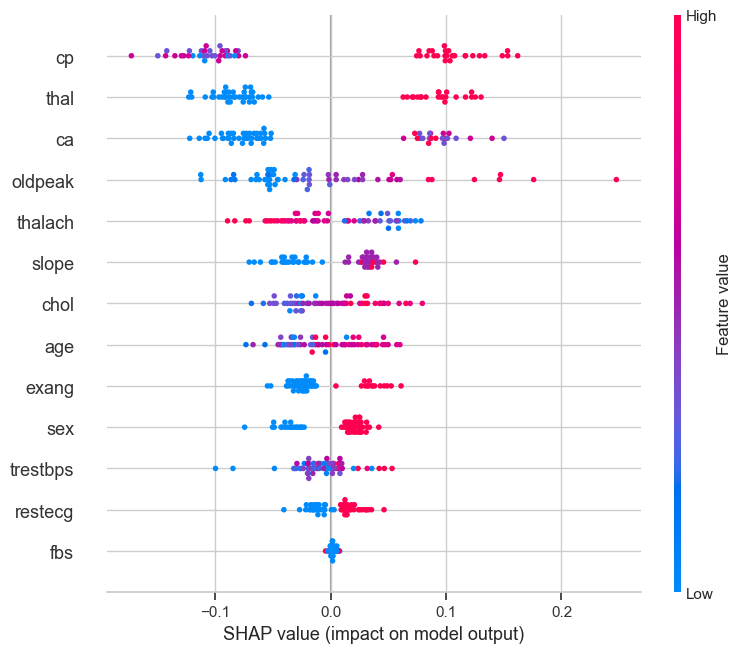

In [68]:
# Cell 2: SHAP Explainer and Global Summary Plot

# Ensure X_test_shap_scaled_df is a DataFrame with correct column names
# Ensure model_for_shap is trained

print("\n--- SHAP Analysis ---")
# Use TreeExplainer for tree-based models like RandomForest
explainer_shap = shap.TreeExplainer(model_for_shap)

# Calculate SHAP values. Pass DataFrame for automatic feature_names.
# SHAP values for tree models typically have shape (num_classes, num_samples, num_features)
# or (num_samples, num_features) for binary if one output is chosen,
# or (num_samples, num_features, num_classes) for some versions.
# For scikit-learn RF, shap_values call often returns a list of two arrays (one for each class's probability)
shap_values_test = explainer_shap.shap_values(X_test_shap_scaled_df) # Pass DataFrame

# Check the structure of shap_values_test
if isinstance(shap_values_test, list) and len(shap_values_test) == 2:
    print(f"SHAP values returned as a list of 2 arrays (for class 0 and class 1 probabilities).")
    print(f"Shape of SHAP values for class 0: {shap_values_test[0].shape}")
    print(f"Shape of SHAP values for class 1: {shap_values_test[1].shape}")
    # We are interested in SHAP values for the positive class (class 1)
    shap_values_positive_class_test = shap_values_test[1]
elif isinstance(shap_values_test, np.ndarray) and shap_values_test.ndim == 3: # (num_samples, num_features, num_classes)
    print(f"SHAP values returned as 3D ndarray (num_samples, num_features, num_classes). Shape: {shap_values_test.shape}")
    shap_values_positive_class_test = shap_values_test[:, :, 1]
elif isinstance(shap_values_test, np.ndarray) and shap_values_test.ndim == 2: # (num_samples, num_features) for binary's main output
     print(f"SHAP values returned as 2D ndarray (num_samples, num_features). Shape: {shap_values_test.shape}")
     shap_values_positive_class_test = shap_values_test # Assuming these are for the positive class prediction
else:
    raise ValueError(f"Unexpected SHAP values structure: {type(shap_values_test)}")


print(f"\nShape of SHAP values for positive class: {shap_values_positive_class_test.shape}")
print(f"Shape of X_test_shap_scaled_df: {X_test_shap_scaled_df.shape}")


# --- Global Feature Importance (Summary Plot) ---
print("\nSHAP Summary Plot (Global Feature Importance for Class 1 'Disease'):")
shap.summary_plot(
    shap_values_positive_class_test,
    features=X_test_shap_scaled_df, # Pass DataFrame for feature values
    # feature_names=X_test_shap_scaled_df.columns.tolist(), # Already inferred if features is DataFrame
    plot_type="dot", # "bar" is also an option for mean absolute SHAP
    show=True
)



Explaining a True Positive case (Test Set Index: 23, Array Index: 6)
Predicted: 1, Actual: 1


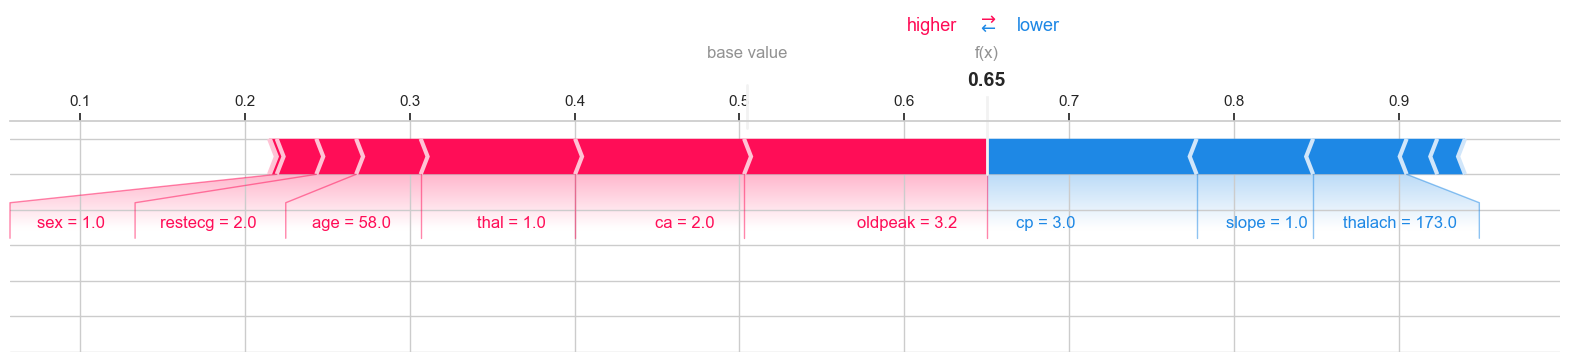


Explaining a False Negative case (Test Set Index: 66, Array Index: 8)
Predicted: 0, Actual: 1


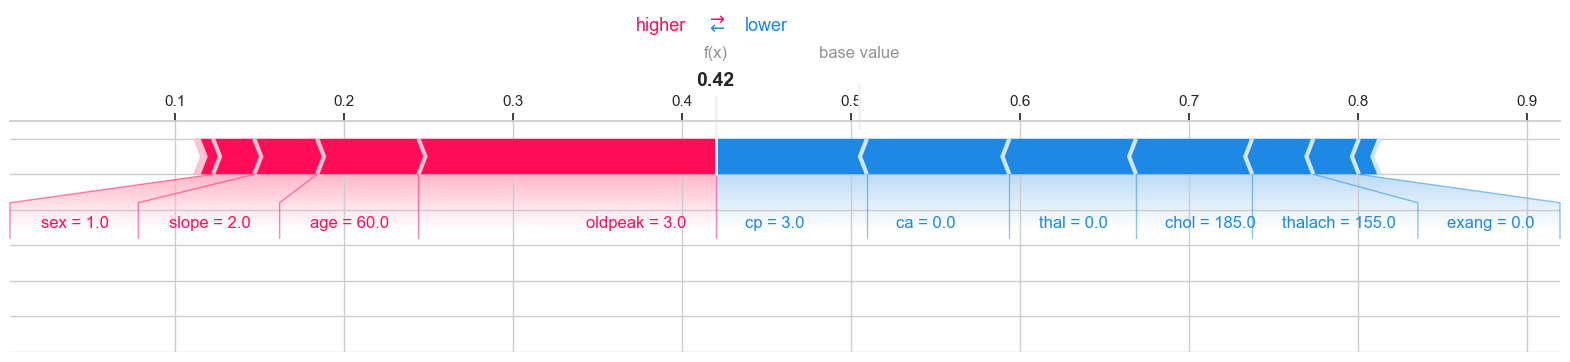


Explaining a False Positive case (Test Set Index: 102, Array Index: 3)
Predicted: 1, Actual: 0


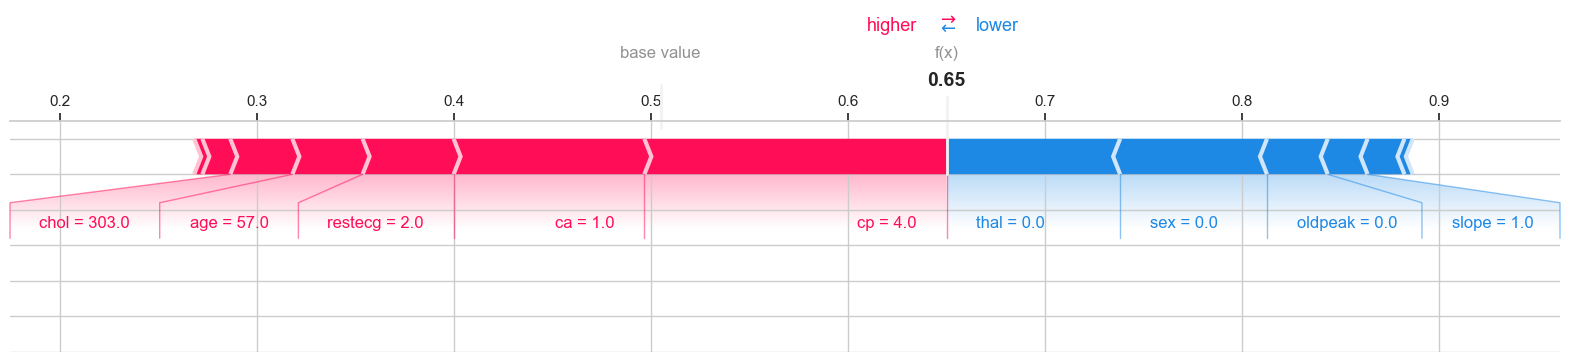

In [71]:
# Cell 3: SHAP Local Explanations (Force Plots - MODIFIED for unscaled display)

shap.initjs()

# --- Explain a True Positive Case ---
if len(tp_indices_shap) > 0:
    idx_tp = tp_indices_shap[0]
    print(f"\nExplaining a True Positive case (Test Set Index: {X_test_shap.index[idx_tp]}, Array Index: {idx_tp})")
    print(f"Predicted: {y_pred_for_shap[idx_tp]}, Actual: {y_test_shap.iloc[idx_tp]}")
    
    expected_value_positive_class = explainer_shap.expected_value[1] if isinstance(explainer_shap.expected_value, np.ndarray) and len(explainer_shap.expected_value) == 2 else explainer_shap.expected_value

    shap.force_plot(
        expected_value_positive_class,
        shap_values_positive_class_test[idx_tp, :],
        X_test_shap.iloc[idx_tp, :],      # MODIFIED: Using unscaled X_test_shap for display
        # feature_names=X_test_shap.columns.tolist(), # Pass if X_test_shap.iloc is a Series without names
        matplotlib=True 
    )
    plt.show()
else:
    print("\nNo True Positive cases found in the SHAP test set to explain.")

# --- Explain a False Negative Case ---
if len(fn_indices_shap) > 0:
    idx_fn = fn_indices_shap[0]
    print(f"\nExplaining a False Negative case (Test Set Index: {X_test_shap.index[idx_fn]}, Array Index: {idx_fn})")
    print(f"Predicted: {y_pred_for_shap[idx_fn]}, Actual: {y_test_shap.iloc[idx_fn]}")

    expected_value_positive_class = explainer_shap.expected_value[1] if isinstance(explainer_shap.expected_value, np.ndarray) and len(explainer_shap.expected_value) == 2 else explainer_shap.expected_value
    
    shap.force_plot(
        expected_value_positive_class,
        shap_values_positive_class_test[idx_fn, :],
        X_test_shap.iloc[idx_fn, :],      # MODIFIED: Using unscaled X_test_shap for display
        matplotlib=True
    )
    plt.show()
else:
    print("\nNo False Negative cases found in the SHAP test set to explain.")

# --- Explain a False Positive Case ---
if len(fp_indices_shap) > 0:
    idx_fp = fp_indices_shap[0]
    print(f"\nExplaining a False Positive case (Test Set Index: {X_test_shap.index[idx_fp]}, Array Index: {idx_fp})")
    print(f"Predicted: {y_pred_for_shap[idx_fp]}, Actual: {y_test_shap.iloc[idx_fp]}")

    expected_value_positive_class = explainer_shap.expected_value[1] if isinstance(explainer_shap.expected_value, np.ndarray) and len(explainer_shap.expected_value) == 2 else explainer_shap.expected_value

    shap.force_plot(
        expected_value_positive_class,
        shap_values_positive_class_test[idx_fp, :], 
        X_test_shap.iloc[idx_fp, :],      # MODIFIED: Using unscaled X_test_shap for display
        matplotlib=True
    )
    plt.show()
else:
    print("\nNo False Positive cases found in the SHAP test set to explain.")


In [70]:
# Cell 4: SHAP Analysis of Misclassifications (FP/FN) using Plotly

# --- Features Contributing to False Positives ---
if len(fp_indices_shap) > 0:
    shap_fp_values = shap_values_positive_class_test[fp_indices_shap, :]
    mean_abs_shap_fp = np.abs(shap_fp_values).mean(axis=0)

    fp_df_shap = pd.DataFrame({
        'Feature': X_test_shap_scaled_df.columns,
        'Mean_Abs_SHAP_FP': mean_abs_shap_fp
    }).sort_values(by='Mean_Abs_SHAP_FP', ascending=False)

    fig_fp = px.bar(
        fp_df_shap.head(10), # Show top 10
        x='Mean_Abs_SHAP_FP',
        y='Feature',
        orientation='h',
        title='Top Features Influencing False Positives (Mean |SHAP| for Class 1)',
        labels={'Feature': 'Feature', 'Mean_Abs_SHAP_FP': 'Mean Absolute SHAP Value (towards Disease)'},
        height=400
    )
    fig_fp.update_layout(yaxis={'categoryorder':'total ascending'})
    fig_fp.show()
else:
    print("\nNo False Positives to analyze for SHAP contributions.")

# --- Features Contributing to False Negatives ---
if len(fn_indices_shap) > 0:
    shap_fn_values = shap_values_positive_class_test[fn_indices_shap, :]
    mean_abs_shap_fn = np.abs(shap_fn_values).mean(axis=0)

    fn_df_shap = pd.DataFrame({
        'Feature': X_test_shap_scaled_df.columns,
        'Mean_Abs_SHAP_FN': mean_abs_shap_fn
    }).sort_values(by='Mean_Abs_SHAP_FN', ascending=False)

    fig_fn = px.bar(
        fn_df_shap.head(10), # Show top 10
        x='Mean_Abs_SHAP_FN',
        y='Feature',
        orientation='h',
        title='Top Features Influencing False Negatives (Mean |SHAP| for Class 1)',
        labels={'Feature': 'Feature', 'Mean_Abs_SHAP_FN': 'Mean Absolute SHAP Value (towards Disease)'},
        height=400
    )
    fig_fn.update_layout(yaxis={'categoryorder':'total ascending'})
    fig_fn.show()
else:
    print("\nNo False Negatives to analyze for SHAP contributions.")


### SHAP Analysis Results & Interpretation

We applied SHAP analysis to our trained Random Forest (Baseline Binary) model to understand feature contributions to predictions for the presence of heart disease (Class 1).

---
#### 1. Global Feature Importance (SHAP Summary Plot - Dot Version)


The SHAP summary plot (dot version) provides an overview of global feature importance and impact:
*   **Feature Ranking:** Features are ranked by their overall importance (sum of absolute SHAP values across all samples). From the plot, `cp` (chest pain type) appears to be the most impactful feature overall, followed by `thal`, `ca`, `oldpeak`, and `thalach`.
*   **Impact Direction & Magnitude:**
    *   Each dot represents a patient in the test set for a specific feature.
    *   The **horizontal position** of the dot shows its SHAP value – how much it pushed the prediction towards disease (positive SHAP) or away from disease (negative SHAP).
    *   The **color** of the dot indicates the feature's original value for that patient (Red = High feature value, Blue = Low feature value).
*   **Key Observations from Dot Plot:**
    *   **`cp` (Chest Pain Type):** Lower values of `cp` (e.g., typical angina, often encoded as 1) tend to have negative SHAP values (pushing away from disease prediction), while higher values (e.g., asymptomatic, often encoded as 4) tend to have positive SHAP values (pushing towards disease prediction). This indicates a strong, somewhat direct relationship.
    *   **`thal` (Thallium Scan):** Higher values (e.g., reversible defect, often encoded as 7 or mapped to 1 or 2 in your preprocessing) strongly push towards disease (positive SHAP values). Lower values (normal, often 3 or mapped to 0) push away.
    *   **`ca` (Number of Major Vessels):** Higher numbers of vessels colored by fluoroscopy generally push towards a higher prediction of disease (positive SHAP).
    *   **`oldpeak` (ST Depression):** Higher values of ST depression strongly push towards disease prediction.
    *   **`thalach` (Max Heart Rate):** Higher max heart rates (red dots) generally have negative SHAP values (pushing *away* from disease), which is clinically consistent (healthier individuals can achieve higher heart rates).
    *   **`slope` (ST Slope):** The impact seems mixed; flat or downsloping `slope` values (often higher numerically) might push towards disease.
    *   **`exang` (Exercise Induced Angina):** Presence of `exang` (value 1, often red) pushes towards disease prediction. Absence (value 0, often blue) pushes away.
    *   Features like `chol`, `age`, `sex`, `trestbps`, `restecg`, and `fbs` show more mixed impacts or smaller overall SHAP value magnitudes, indicating less dominant global importance compared to the top features for this model.

---
#### 2. Local Explanations (SHAP Force Plots)

We examined individual predictions:

*   **Example 1: True Positive (Predicted Disease=0.65, Actual Disease)**
    
    *   The model predicted a 0.65 probability of disease.
    *   **Drivers towards Disease (Red):** `sex=1.0` (male), `restecg=2.0`, `age=58.0`, `thal=1.0`, `ca=2.0`, and most significantly `oldpeak=3.2`. These feature values for this patient pushed the prediction higher than the baseline.
    *   **Drivers away from Disease (Blue):** `cp=3.0` (non-anginal pain), `slope=1.0` (upsloping), and `thalach=173.0` (high max heart rate). These features pulled the prediction lower.
    *   The net effect of these pushes resulted in the final prediction of 0.65.

*   **Example 2: True Negative (Predicted No Disease=0.42, Actual No Disease)**
    
    *   The model predicted a 0.42 probability of disease (thus classifying as No Disease if threshold is 0.5).
    *   **Drivers towards Disease (Red):** `sex=1.0`, `slope=2.0`, `age=60.0`, `oldpeak=3.0`.
    *   **Drivers away from Disease (Blue):** `cp=3.0`, `ca=0.0`, `thal=0.0`, `chol=185.0`, `thalach=155.0`, `exang=0.0`. The blue features collectively had a stronger pull, leading to the lower prediction.

*   **Example 3: False Positive (Predicted Disease=0.65, Actual No Disease)**
    
    *   The model incorrectly predicted a 0.65 probability of disease.
    *   **Drivers towards Disease (Red):** `chol=303.0`, `age=57.0`, `restecg=2.0`, `ca=1.0`.
    *   **Drivers away from Disease (Blue):** `cp=4.0` (asymptomatic - interesting, as this usually pushes *towards* disease in the summary plot, highlighting instance-specific behavior), `thal=0.0`, `sex=0.0` (female), `oldpeak=0.0`, `slope=1.0`.
    *   The model was pushed towards predicting disease despite some features suggesting otherwise. This case would warrant a closer look at the interactions.

---
#### 3. SHAP Analysis of Misclassifications (Mean |SHAP| for FP/FN)

*   **Features Influencing False Positives (Model predicted disease, but patient was healthy):**
    *   The bar chart shows that `cp`, `ca`, `thal`, `oldpeak`, `sex`, and `age` were, on average, the features with the highest absolute SHAP values that pushed predictions towards "disease" for cases that were actually "no disease". This means for these misclassified healthy individuals, these features (or their interactions) were strongly (and incorrectly) signaling disease to the model.

*   **Features Influencing False Negatives (Model predicted no disease, but patient had disease):**
    *   For patients who actually had disease but were missed by the model, `cp`, `thal`, `ca`, `oldpeak`, and `slope` had the largest average absolute SHAP values. This suggests these features were either not strong enough in their "disease-indicating" state for these specific patients, or other features strongly counteracted them, leading the model to incorrectly predict "no disease".

**Overall SHAP Insights:**
SHAP analysis confirms the importance of features like `cp`, `thal`, `ca`, and `oldpeak` for the Random Forest model. The force plots effectively demonstrate how feature values contribute to individual predictions, and the analysis of FPs/FNs helps pinpoint which features are most involved when the model makes mistakes, offering avenues for further investigation or model refinement. The local explanations show that even globally important features can have varying impacts based on the specific context of other feature values for an individual.